# Introduction

If you have some background in machine learning and you'd like to learn how to quickly improve the quality of your models, you're in the right place! In this course, you will accelerate your machine learning expertise by learning how to:

* tackle data types often found in real-world datasets (__missing values__, __categorical variables__),
* design __pipelines__ to improve the quality of your machine learning code,
* use advanced techniques for model validation (__cross-validation__),
* build state-of-the-art models that are widely used to win Kaggle competitions (__XGBoost__), and
* avoid common and important data science mistakes (__leakage__).

Along the way, you'll apply your knowledge by completing a hands-on exercise with real-world data for each new topic. The hands-on exercises use data from the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course), where you'll use 79 different explanatory variables (such as the type of roof, number of bedrooms, and number of bathrooms) to predict home prices. You'll measure your progress by submitting predictions to this competition and watching your position rise on the [leaderboard!](https://www.kaggle.com/c/home-data-for-ml-course/leaderboard)

## Exercise

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_full = pd.read_csv("train.csv", index_col="Id")
X_test_full = pd.read_csv("test.csv", index_col="Id")

# Obtain target and predictors
y = X_full.SalePrice
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF',
            'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = X_full[features].copy()
X_test = X_test_full[features].copy()

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [2]:
X_train.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
619,11694,2007,1828,0,2,3,9
871,6600,1962,894,0,1,2,5
93,13360,1921,964,0,1,2,5
818,13265,2002,1689,0,2,3,7
303,13704,2001,1541,0,2,3,6


In [3]:
from sklearn.ensemble import RandomForestRegressor

# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

To select the best model out of the five, we define a function `score_model()` below. This function returns the mean absolute error (MAE) from the validation set. Recall that the best model will obtain the lowest MAE. (To review mean absolute error, [look here](https://www.kaggle.com/code/dansbecker/model-validation/tutorial).)

In [4]:
from sklearn.metrics import mean_absolute_error

# Function for comparing different models
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 24015
Model 2 MAE: 23740
Model 3 MAE: 23528
Model 4 MAE: 23996
Model 5 MAE: 23706


### Step 1: Evaluate several models

Use the above results to fill in the line below. Which model is the best model? Your answer should be one of `model_1`, `model_2`, `model_3`, `model_4`, or `model_5`.

In [5]:
# Fill in the best model
best_model = model_3

### Step 2: Generate test predictions

Great. You know how to evaluate what makes an accurate model. Now it's time to go through the modeling process and make predictions. In the line below, create a Random Forest model with the variable name `my_model`.

In [6]:
my_model = RandomForestRegressor()

Run the next code cell without changes.  The code fits the model to the training and validation data, and then generates test predictions that are saved to a CSV file.  These test predictions can be submitted directly to the competition!

In [7]:
# Fit the model to the training data
my_model.fit(X, y)

# Generate test predictions
preds_test = my_model.predict(X_test)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

# Missing Values

## Lecture

There are many ways data can end up with missing values. For example,

* A 2 bedroom house won't include a value for the size of a third bedroom.
* A survey respondent may choose not to share his income.

Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. So you'll need to choose one of the strategies below.

__Three Approaches__
1) A Simple Option: Drop Columns with Missing Values

    The simplest option is to drop columns with missing values.
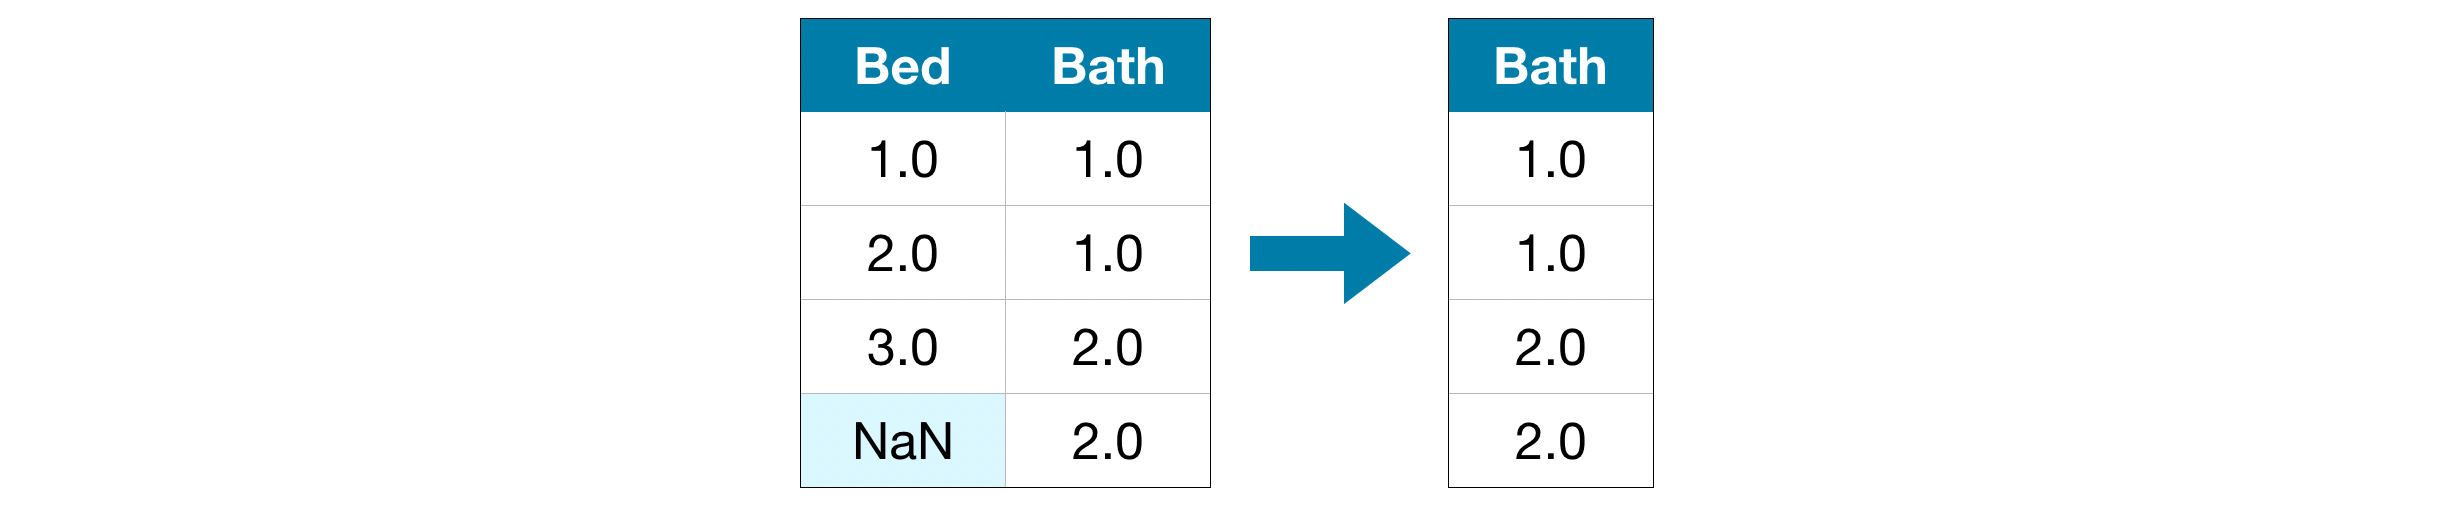
Unless most values in the dropped columns are missing, the model loses access to a lot of (potentially useful!) information with this approach. As an extreme example, consider a dataset with 10,000 rows, where one important column is missing a single entry. This approach would drop the column entirely!

2) A Better Option: Imputation

    Imputation fills in the missing values with some number. For instance, we can fill in the mean value along each column.
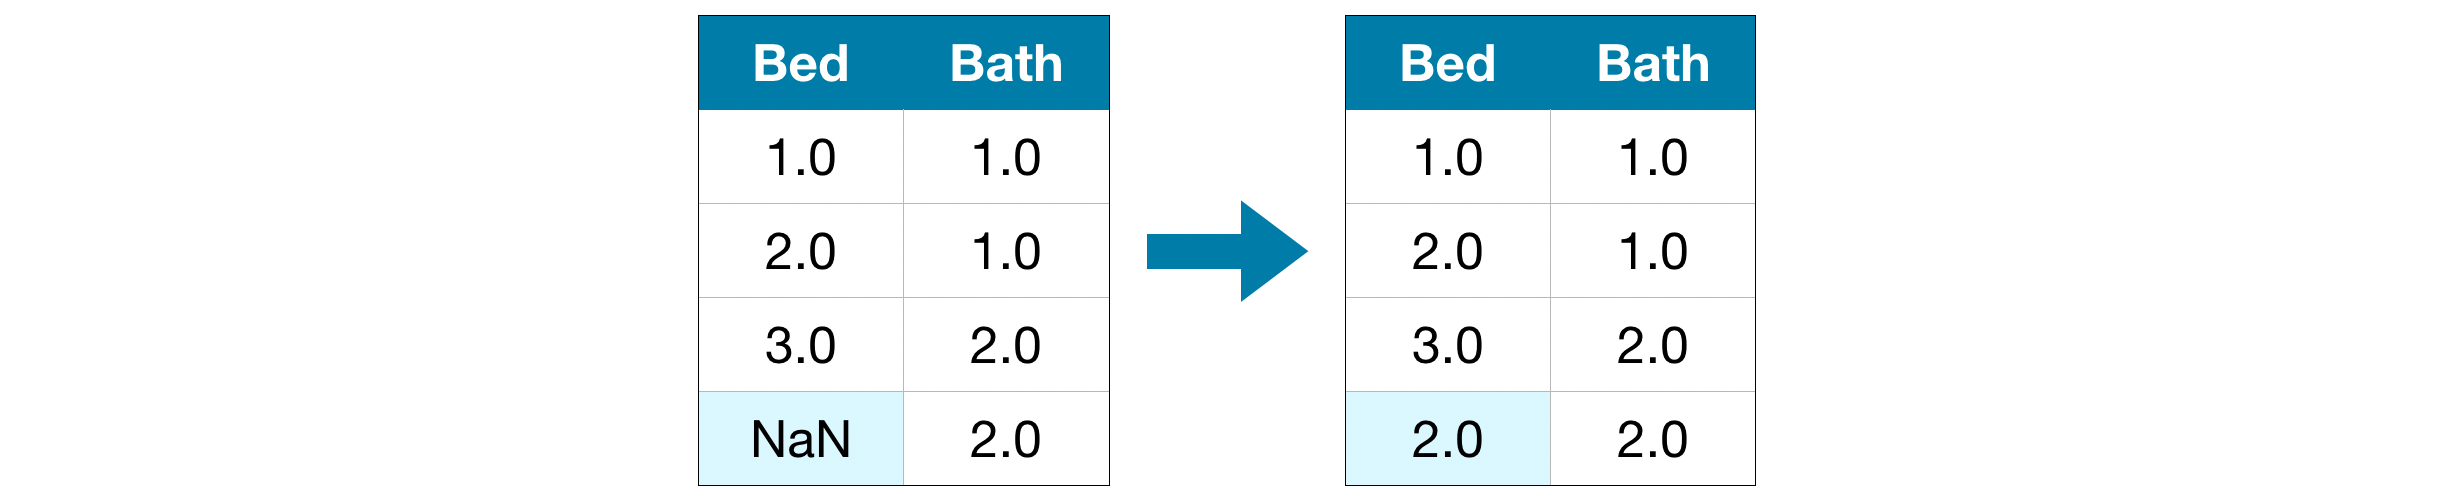
The imputed value won't be exactly right in most cases, but it usually leads to more accurate models than you would get from dropping the column entirely.

3) An Extension To Imputation

Imputation is the standard approach, and it usually works well. However, imputed values may be systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing.
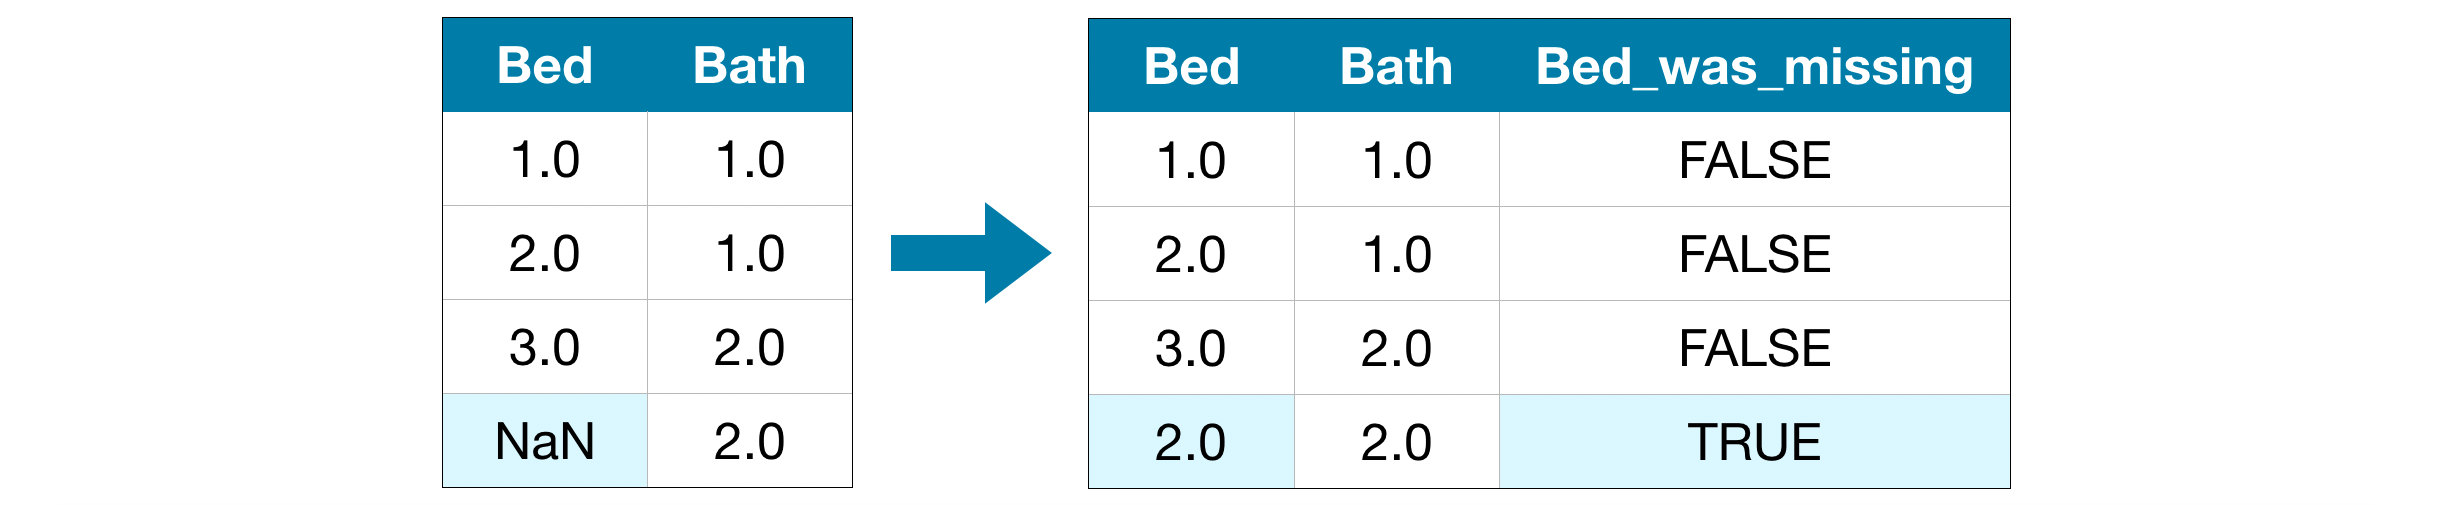

__Example__
In the example, we will work with the Melbourne Housing dataset. Our model will use information such as the number of rooms and land size to predict home price.

We won't focus on the data loading step. Instead, you can imagine you are at a point where you already have the training and validation data in `X_train`, `X_valid`, `y_train`, and `y_valid`.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv("melb_data.csv")

# Select target
y = data.Price

# To keep things simple, we'll use only numerical predictors
melb_predictors = data.drop(['Price'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object'])
X

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,7392.0
13576,3,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,3,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,6380.0
13578,4,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [9]:
# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

Define Function to Measure Quality of Each Approach
We define a function score_dataset() to compare different approaches to dealing with missing values. This function reports the mean absolute error (MAE) from a random forest model.

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

### Score from Approach 1 (Drop Columns with Missing Values)

Since we are working with both training and validation sets, we are careful to drop the same columns in both DataFrames.

In [11]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

cols_with_missing

['Car', 'BuildingArea', 'YearBuilt']

In [12]:
for col in X_train.columns:
    if X_train[col].isnull().any():
        print(col)

Car
BuildingArea
YearBuilt


In [13]:
# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop columns with missing values):
183550.22137772635


### Score from Approach 2 (Imputation)

Next, we use `SimpleImputer` to replace missing values with the mean value along each column.

Although it's simple, filling in the mean value generally performs quite well (but this varies by dataset). While statisticians have experimented with more complex ways to determine imputed values (such as __regression imputation__, for instance), the complex strategies typically give no additional benefit once you plug the results into sophisticated machine learning models.

In [14]:
X_train.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
12167,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.9867,13240.0
6524,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.9005,6380.0
8413,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.8220,3755.0
2919,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.9158,8870.0
6043,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.8272,4217.0


In [15]:
X_valid.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
8505,4,8.0,3016.0,4.0,2.0,2.0,450.0,190.0,1910.0,-37.86100,144.89850,6380.0
5523,2,6.6,3011.0,2.0,1.0,0.0,172.0,81.0,1900.0,-37.81000,144.88960,2417.0
12852,3,10.5,3020.0,3.0,1.0,1.0,581.0,NaN,NaN,-37.76740,144.82421,4217.0
4818,3,4.5,3181.0,2.0,2.0,1.0,128.0,134.0,2000.0,-37.85260,145.00710,7717.0
12812,3,8.5,3044.0,3.0,2.0,2.0,480.0,NaN,NaN,-37.72523,144.94567,7485.0


In [16]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

In [17]:
# custom test
test = pd.DataFrame(my_imputer.transform(X_train))
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,5.0,3182.0,1.0,1.0,1.0,0.0,153.764119,1940.000000,-37.85984,144.9867,13240.0
1,2.0,8.0,3016.0,2.0,2.0,1.0,193.0,153.764119,1964.839866,-37.85800,144.9005,6380.0
2,3.0,12.6,3020.0,3.0,1.0,1.0,555.0,153.764119,1964.839866,-37.79880,144.8220,3755.0
3,3.0,13.0,3046.0,3.0,1.0,1.0,265.0,153.764119,1995.000000,-37.70830,144.9158,8870.0
4,3.0,13.3,3020.0,3.0,1.0,2.0,673.0,673.000000,1970.000000,-37.76230,144.8272,4217.0


In [18]:
imputed_X_train.equals(test)

True

In [19]:
my_imputer.fit_transform(X_train)

array([[ 1.0000000e+00,  5.0000000e+00,  3.1820000e+03, ...,
        -3.7859840e+01,  1.4498670e+02,  1.3240000e+04],
       [ 2.0000000e+00,  8.0000000e+00,  3.0160000e+03, ...,
        -3.7858000e+01,  1.4490050e+02,  6.3800000e+03],
       [ 3.0000000e+00,  1.2600000e+01,  3.0200000e+03, ...,
        -3.7798800e+01,  1.4482200e+02,  3.7550000e+03],
       ...,
       [ 4.0000000e+00,  6.7000000e+00,  3.0580000e+03, ...,
        -3.7735720e+01,  1.4497256e+02,  1.1204000e+04],
       [ 3.0000000e+00,  1.2000000e+01,  3.0730000e+03, ...,
        -3.7720570e+01,  1.4502615e+02,  2.1650000e+04],
       [ 4.0000000e+00,  6.4000000e+00,  3.0110000e+03, ...,
        -3.7794300e+01,  1.4488750e+02,  7.5700000e+03]])

In [20]:
# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

In [21]:
imputed_X_train.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,1.0,5.0,3182.0,1.0,1.0,1.0,0.0,153.764119,1940.000000,-37.85984,144.9867,13240.0
1,2.0,8.0,3016.0,2.0,2.0,1.0,193.0,153.764119,1964.839866,-37.85800,144.9005,6380.0
2,3.0,12.6,3020.0,3.0,1.0,1.0,555.0,153.764119,1964.839866,-37.79880,144.8220,3755.0
3,3.0,13.0,3046.0,3.0,1.0,1.0,265.0,153.764119,1995.000000,-37.70830,144.9158,8870.0
4,3.0,13.3,3020.0,3.0,1.0,2.0,673.0,673.000000,1970.000000,-37.76230,144.8272,4217.0


In [22]:
imputed_X_valid.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,4.0,8.0,3016.0,4.0,2.0,2.0,450.0,190.000000,1910.000000,-37.86100,144.89850,6380.0
1,2.0,6.6,3011.0,2.0,1.0,0.0,172.0,81.000000,1900.000000,-37.81000,144.88960,2417.0
2,3.0,10.5,3020.0,3.0,1.0,1.0,581.0,153.764119,1964.839866,-37.76740,144.82421,4217.0
3,3.0,4.5,3181.0,2.0,2.0,1.0,128.0,134.000000,2000.000000,-37.85260,145.00710,7717.0
4,3.0,8.5,3044.0,3.0,2.0,2.0,480.0,153.764119,1964.839866,-37.72523,144.94567,7485.0


In [23]:
print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE from Approach 2 (Imputation):
178166.46269899711


We see that __Approach 2__ has lower MAE than Approach 1, so __Approach 2__ performed better on this dataset.

### Score from Approach 3 (An Extension to Imputation)

Next, we impute the missing values, while also keeping track of which values were imputed.

In [24]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

In [25]:
cols_with_missing

['Car', 'BuildingArea', 'YearBuilt']

In [26]:
X_train_plus[col].isnull()

12167    False
6524     False
8413     False
2919     False
6043     False
         ...  
13123    False
3264     False
9845     False
10799    False
2732     False
Name: Propertycount, Length: 10864, dtype: bool

In [27]:
# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

In [28]:
X_train_plus.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Car_was_missing,BuildingArea_was_missing,YearBuilt_was_missing
12167,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.9867,13240.0,False,True,False
6524,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.9005,6380.0,False,True,True
8413,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.8220,3755.0,False,True,True
2919,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.9158,8870.0,False,True,False
6043,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.8272,4217.0,False,False,False


In [29]:
X_valid_plus.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Car_was_missing,BuildingArea_was_missing,YearBuilt_was_missing
8505,4,8.0,3016.0,4.0,2.0,2.0,450.0,190.0,1910.0,-37.86100,144.89850,6380.0,False,False,False
5523,2,6.6,3011.0,2.0,1.0,0.0,172.0,81.0,1900.0,-37.81000,144.88960,2417.0,False,False,False
12852,3,10.5,3020.0,3.0,1.0,1.0,581.0,NaN,NaN,-37.76740,144.82421,4217.0,False,True,True
4818,3,4.5,3181.0,2.0,2.0,1.0,128.0,134.0,2000.0,-37.85260,145.00710,7717.0,False,False,False
12812,3,8.5,3044.0,3.0,2.0,2.0,480.0,NaN,NaN,-37.72523,144.94567,7485.0,False,True,True


In [30]:
# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

In [31]:
print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

MAE from Approach 3 (An Extension to Imputation):
178927.503183954


As we can see, __Approach 3__ performed slightly worse than __Approach 2__.

__So, why did imputation perform better than dropping the columns?__

The training data has 10864 rows and 12 columns, where three columns contain missing data. For each column, less than half of the entries are missing. Thus, dropping the columns removes a lot of useful information, and so it makes sense that imputation would perform better.

In [32]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

(10864, 12)


In [33]:
# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Car               49
BuildingArea    5156
YearBuilt       4307
dtype: int64


### Conclusion

As is common, imputing missing values (in __Approach 2__ and __Approach 3__) yielded better results, relative to when we simply dropped columns with missing values (in __Approach 1__).

## Exercise

In this exercise, you will work with data from [the Housing Prices Competition for Kaggle Learn User](https://www.kaggle.com/c/home-data-for-ml-course)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [35]:
# Read data
X_full = pd.read_csv("train.csv", index_col="Id")
X_test_full = pd.read_csv("test.csv", index_col="Id")

In [36]:
X_full.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [37]:
X_test_full.isna().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [38]:
# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

In [39]:
# To keep things simple, we'll use only numerical predictors
X = X_full.select_dtypes(exclude=['object'])
X_test = X_test_full.select_dtypes(exclude=['object'])

In [40]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,
                                                      test_size=0.2, 
                                                      random_state=0)

In [41]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,20,90.0,11694,9,5,2007,2007,452.0,48,0,...,774,0,108,0,0,260,0,0,7,2007
871,20,60.0,6600,5,5,1962,1962,0.0,0,0,...,308,0,0,0,0,0,0,0,8,2009
93,30,80.0,13360,5,7,1921,2006,0.0,713,0,...,432,0,0,44,0,0,0,0,8,2009
818,20,NaN,13265,8,5,2002,2002,148.0,1218,0,...,857,150,59,0,0,0,0,0,7,2008
303,20,118.0,13704,7,5,2001,2002,150.0,0,0,...,843,468,81,0,0,0,0,0,1,2006


### Step 1: Preliminary investigation

In [42]:
# Shape of trainning data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(1168, 36)
LotFrontage    212
MasVnrArea       6
GarageYrBlt     58
dtype: int64


### Part A

In [43]:
# Fill in the line below: How many rows are in the training data?
num_rows = 1168

# Fill in the line below: How many columns in the training data
# have missing values?
num_cols_with_missing = 3

# Fill in the line below: How many missing entries are contained in 
# all of the training data?
tot_missing = 212+6+58

### Part B

__Considering your answers above, what do you think is likely the best approach to dealing with the missing values?__

__Answer__: Since there are relatively few missing entries in the data (the column with the greatest percentage of missing values is missing less than 20% of its entries), we can expect that dropping columns is unlikely to yield good results. This is because we'd be throwing away a lot of valuable data, and so imputation will likely perform better.

To compare different approaches to dealing with missing values, you'll use the same `score_dataset()` function from the tutorial. This function reports the __mean absolute error__ (MAE) from a random forest model.

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

### Step 2: Drop columns with missing values

In this step, you'll preprocess the data in `X_train` and `X_valid` to remove columns with missing values. Set the preprocessed DataFrames to `reduced_X_train` and `reduced_X_valid`, respectively.

In [45]:
missed_val_col_train = (X_train.isnull().sum())
missed_val_col_train = missed_val_col_train[missed_val_col_train > 0]
missed_col_train = missed_val_col_train.index

In [46]:
# Fill in the line below: get names of columns with missing values
# For X_train
missed_val_col_train = (X_train.isnull().sum())
missed_col_train = missed_val_col_train[missed_val_col_train > 0].index

# For X_valid
missed_val_col_valid = (X_valid.isnull().sum())
missed_col_valid = missed_val_col_valid[missed_val_col_valid > 0].index


# Fill in the lines below: drop columns in training and validation data
reduced_X_train = X_train.drop(missed_col_train, axis=1)
reduced_X_valid = X_valid.drop(missed_col_valid, axis=1)

In [47]:
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE (Drop columns with missing values):
17837.82570776256


### Step 3: Imputation

#### Part A

Use the next code cell to impute missing values with the mean value along each column. Set the preprocessed DataFrames to `imputed_X_train` and `imputed_X_valid`. Make sure that the column names match those in `X_train` and `X_valid`.

In [48]:
from sklearn.impute import SimpleImputer

# Fill in the lines below: imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Fill in the lines below: imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_train.columns

In [49]:
print("MAE (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE (Imputation):
18062.894611872147


#### Part B

Compare the MAE from each approach. Does anything surprise you about the results? Why do you think one approach performed better than the other?

__Answer__: Given that there are so few missing values in the dataset, we'd expect imputation to perform better than dropping columns entirely. However, we see that dropping columns performs slightly better! While this can probably partially be attributed to noise in the dataset, another potential explanation is that the imputation method is not a great match to this dataset. That is, maybe instead of filling in the mean value, it makes more sense to set every missing value to a value of 0, to fill in the most frequently encountered value, or to use some other method. For instance, consider the `GarageYrBlt` column (which indicates the year that the garage was built). It's likely that in some cases, a missing value could indicate a house that does not have a garage. Does it make more sense to fill in the median value along each column in this case? Or could we get better results by filling in the minimum value along each column? It's not quite clear what's best in this case, but perhaps we can rule out some options immediately - for instance, setting missing values in this column to 0 is likely to yield horrible results!

### Step 4: Generate test predictions

In this final step, you'll use any approach of your choosing to deal with missing values. Once you've preprocessed the training and validation features, you'll train and evaluate a random forest model. Then, you'll preprocess the test data before generating predictions that can be submitted to the competition!

#### Part A

Use the next code cell to preprocess the training and validation data. Set the preprocessed DataFrames to `final_X_train` and `final_X_valid`. __You can use any approach of your choosing here!__ in order for this step to be marked as correct, you need only ensure:

* the preprocessed DataFrames have the same number of columns,
* the preprocessed DataFrames have no missing values,
* `final_X_train` and `y_train` have the same number of rows, and
* `final_X_valid` and `y_valid` have the same number of rows.

In [50]:
X_train.shape, X_valid.shape

((1168, 36), (292, 36))

In [51]:
# Imputation
final_imputer = SimpleImputer()
final_X_train = pd.DataFrame(final_imputer.fit_transform(X_train))
final_X_valid = pd.DataFrame(final_imputer.transform(X_valid))

final_X_train.columns = X_train.columns
final_X_valid.columns = X_valid.columns

final_X_train.shape, final_X_valid.shape

((1168, 36), (292, 36))

Run the next code cell to train and evaluate a random forest model. (Note that we don't use the `score_dataset()` function above, because we will soon use the trained model to generate test predictions!)

In [52]:
# Define and fit model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(final_X_train, y_train)

# Get validation predictions and MAE
preds_valid = model.predict(final_X_valid)
print("MAE (Your approach):")
print(mean_absolute_error(y_valid, preds_valid))

MAE (Your approach):
18062.894611872147


#### Part B

Use the next code cell to preprocess your test data. Make sure that you use a method that agrees with how you preprocessed the training and validation data, and set the preprocessed test features to `final_X_test`.

Then, use the preprocessed test features and the trained model to generate test predictions in preds_test.

In order for this step to be marked correct, you need only ensure:

* the preprocessed test DataFrame has no missing values, and
* `final_X_test` has the same number of rows as X_test.

In [53]:
X_test = X_test_full.select_dtypes(exclude='object')

In [54]:
# Fill in the line below: preprocess test data
final_X_test = pd.DataFrame(final_imputer.transform(X_test))

# Fill in the line below: get test predictions
preds_test = model.predict(final_X_test)


/home/htetaunglynn/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Save test predictions to file**

```python
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)
```

In [55]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

# Categorical Variables

## Lecture

### Introduction

A __categorical__ variable takes only a limited number of values.

* Consider a survey that asks how often you eat breakfast and provides four options: "Never", "Rarely", "Most days", or "Every day". In this case, the data is categorical, because responses fall into a fixed set of categories.
* If people responded to a survey about which what brand of car they owned, the responses would fall into categories like "Honda", "Toyota", and "Ford". In this case, the data is also categorical.

You will get an error if you try to plug these variables into most machine learning models in Python without preprocessing them first. In this tutorial, we'll compare three approaches that you can use to prepare your categorical data.

### Three Approaches

1) Drop Categorical Variables

The easiest approach to dealing with categorical variables is to simply remove them from the dataset. This approach will only work well if the columns did not contain useful information.

2) Ordinal Encoding

__Ordinal encoding__ assigns each unique value to a different integer.

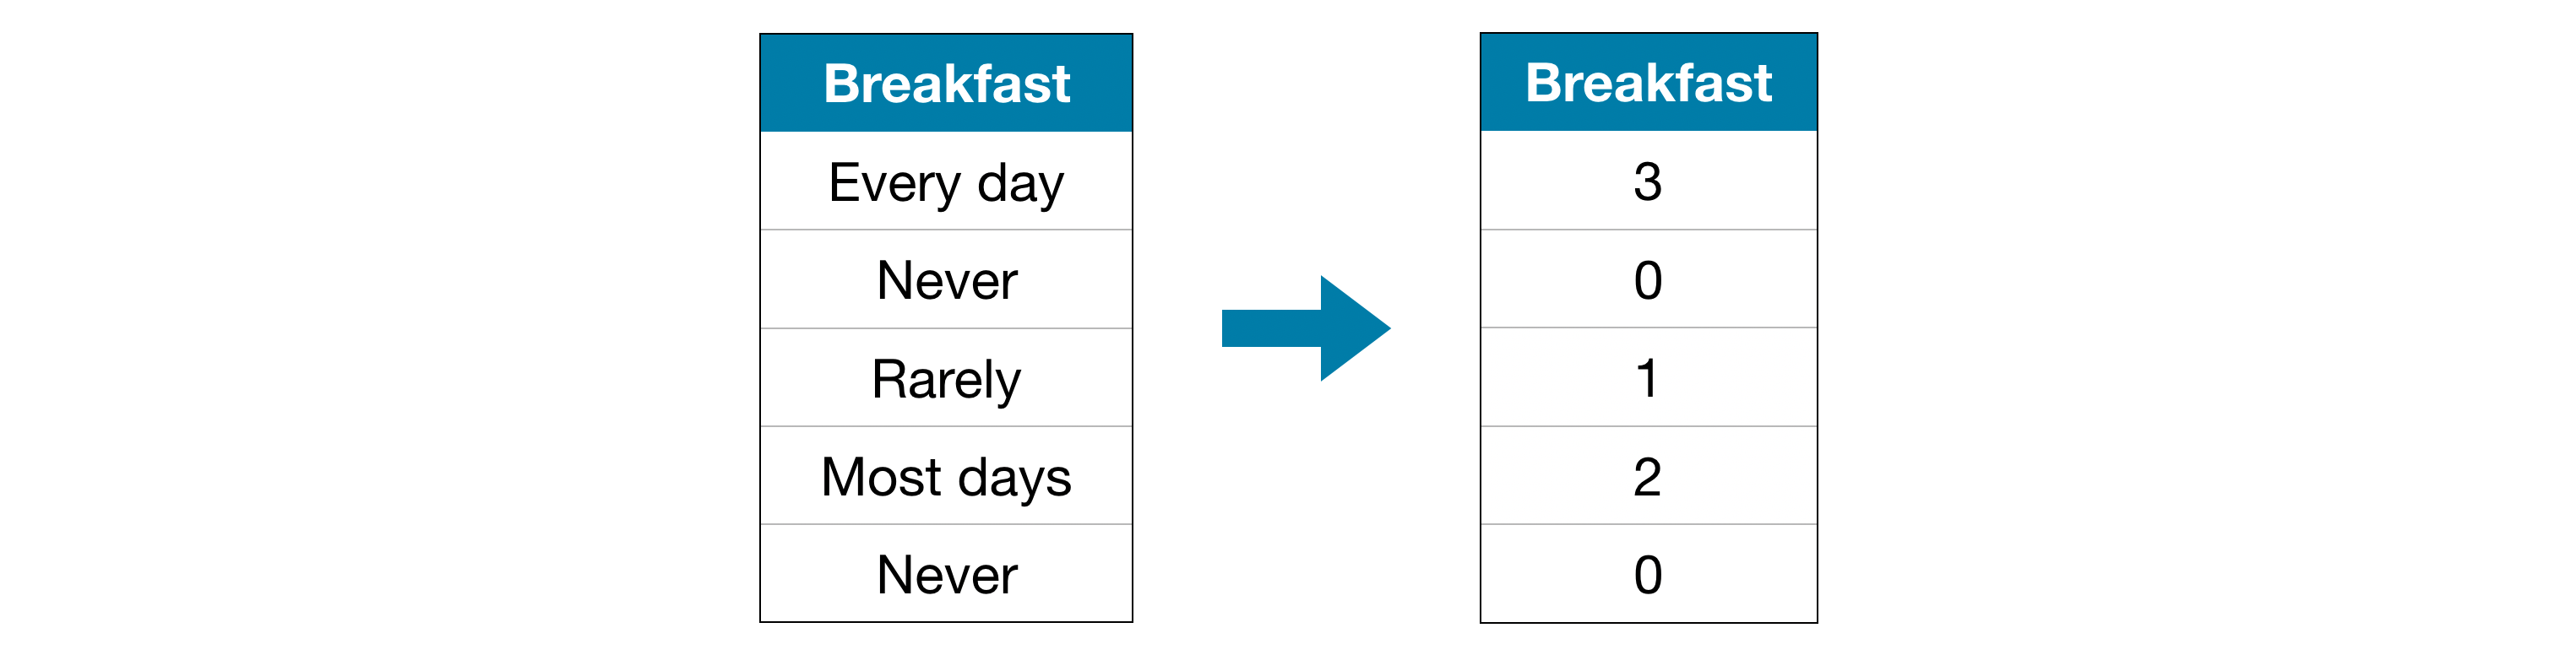

This approach assumes an ordering of the categories: "Never" (0) < "Rarely" (1) < "Most days" (2) < "Every day" (3).

This assumption makes sense in this example, because there is an indisputable ranking to the categories. Not all categorical variables have a clear ordering in the values, but we refer to those that do as __ordinal variables__. For tree-based models (like decision trees and random forests), you can expect ordinal encoding to work well with ordinal variables.

3) One-Hot Encoding

__One-hot encoding__ creates new columns indicating the presence (or absence) of each possible value in the original data. To understand this, we'll work through an example.

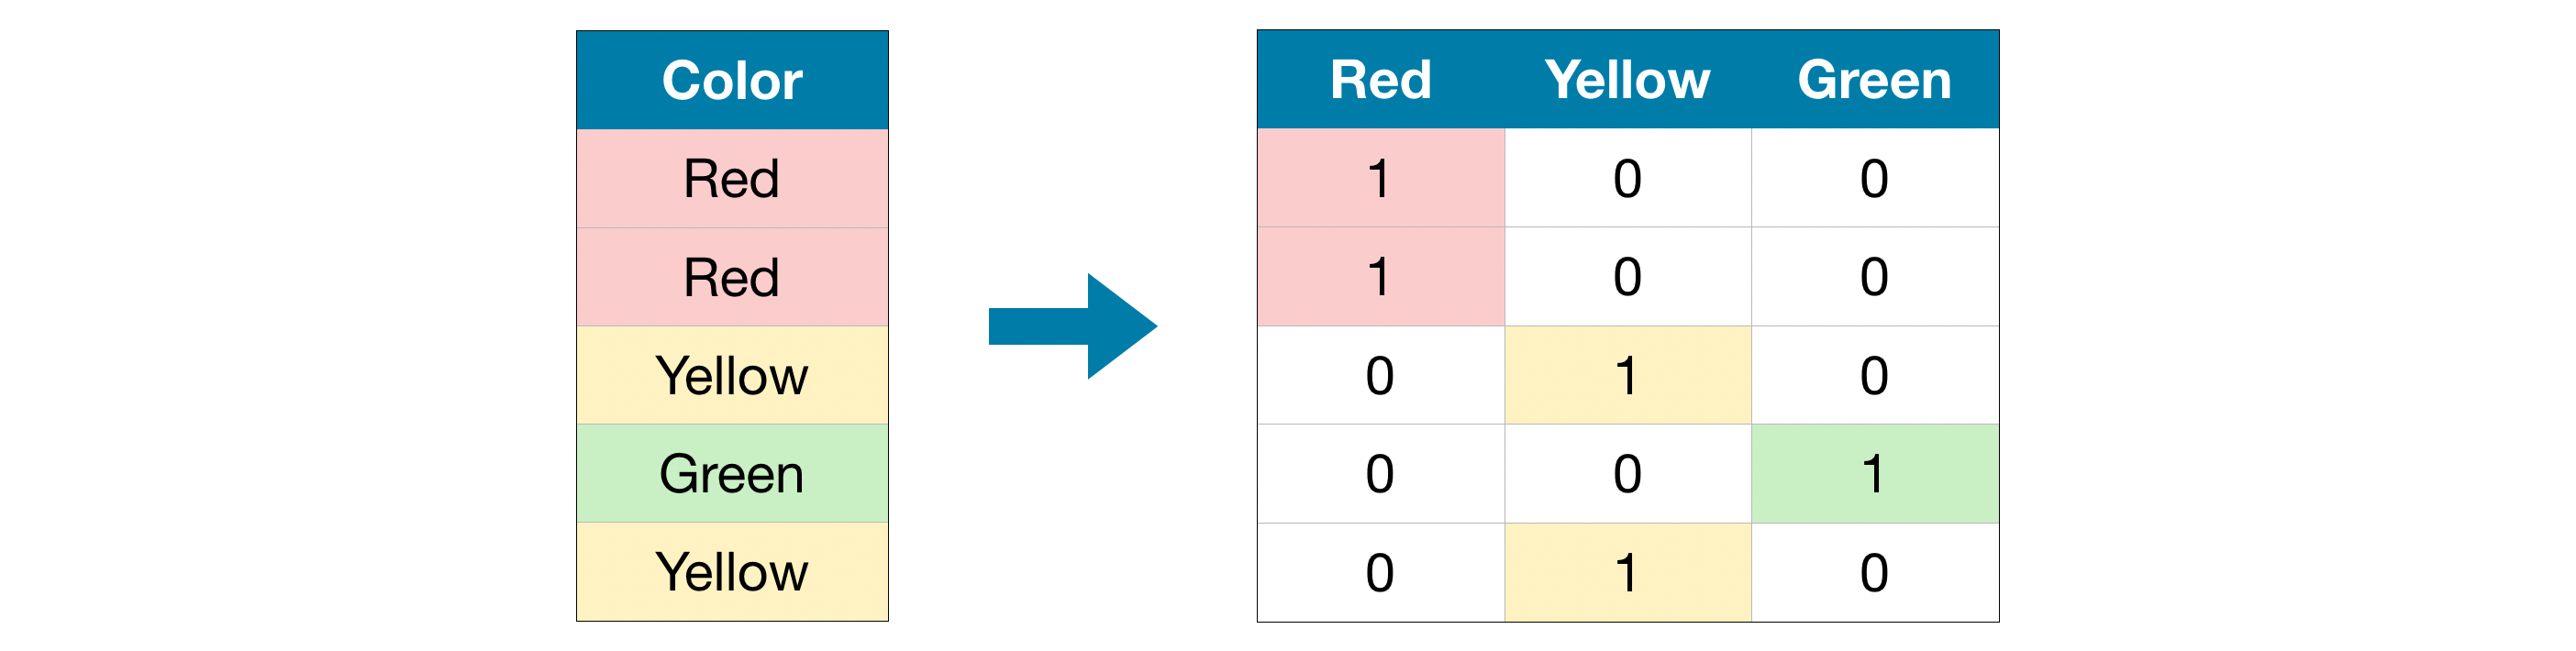

In the original dataset, "Color" is a categorical variable with three categories: "Red", "Yellow", and "Green". The corresponding one-hot encoding contains one column for each possible value, and one row for each row in the original dataset. Wherever the original value was "Red", we put a 1 in the "Red" column; if the original value was "Yellow", we put a 1 in the "Yellow" column, and so on.

In contrast to ordinal encoding, one-hot encoding does not assume an ordering of the categories. Thus, you can expect this approach to work particularly well if there is no clear ordering in the categorical data (e.g., "Red" is neither more nor less than "Yellow"). We refer to categorical variables without an intrinsic ranking as __nominal variables__.

One-hot encoding generally does not perform well if the categorical variable takes on a large number of values (i.e., you generally won't use it for variables taking more than 15 different values).

__Example__
As in the previous tutorial, we will work with the [Melbourne Housing dataset](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home).

We won't focus on the data loading step. Instead, you can imagine you are at a point where you already have the training and validation data in X_train, X_valid, y_train, and y_valid.

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read data
data = pd.read_csv("melb_data.csv")

# Separate target from predictors
y = data.Price
X = data.drop("Price", axis=1)

In [57]:
# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8,
                                                               test_size=0.2, random_state=0)

In [58]:
# Drop columns with missing values (simplest approach)
cols_with_missing = [col for col in X_train_full.columns if X_train_full[col].isnull().any()]
print(cols_with_missing)
X_train_full.drop(cols_with_missing, axis=1, inplace=True)
X_valid_full.drop(cols_with_missing, axis=1, inplace=True)

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']


In [59]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                       X_train_full[cname].dtype == 'object']
low_cardinality_cols

['Type', 'Method', 'Regionname']

In [60]:
# In depth study
for cname in X_train_full.columns:
    print("col:", cname)
    print("nunique:", X_train_full[cname].nunique())
    print("dtype:", X_train_full[cname].dtype)
    if X_train_full[cname].nunique() < 10 and X_train_full[cname].dtype == 'object':
        print("chose col:", cname)

col: Suburb
nunique: 308
dtype: object
col: Address
nunique: 10742
dtype: object
col: Rooms
nunique: 9
dtype: int64
col: Type
nunique: 3
dtype: object
chose col: Type
col: Method
nunique: 5
dtype: object
chose col: Method
col: SellerG
nunique: 251
dtype: object
col: Date
nunique: 58
dtype: object
col: Distance
nunique: 200
dtype: float64
col: Postcode
nunique: 194
dtype: float64
col: Bedroom2
nunique: 12
dtype: float64
col: Bathroom
nunique: 8
dtype: float64
col: Landsize
nunique: 1353
dtype: float64
col: Lattitude
nunique: 5607
dtype: float64
col: Longtitude
nunique: 6054
dtype: float64
col: Regionname
nunique: 8
dtype: object
chose col: Regionname
col: Propertycount
nunique: 305
dtype: float64


In [61]:
# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]
numerical_cols

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Landsize',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [62]:
# In depth study
for cname in X_train_full.columns:
    print("col:", cname)
    print("dtype:", X_train_full[cname].dtype)
    if X_train_full[cname].dtype in ['int64', 'float64']:
        print("chose col:", cname)

col: Suburb
dtype: object
col: Address
dtype: object
col: Rooms
dtype: int64
chose col: Rooms
col: Type
dtype: object
col: Method
dtype: object
col: SellerG
dtype: object
col: Date
dtype: object
col: Distance
dtype: float64
chose col: Distance
col: Postcode
dtype: float64
chose col: Postcode
col: Bedroom2
dtype: float64
chose col: Bedroom2
col: Bathroom
dtype: float64
chose col: Bathroom
col: Landsize
dtype: float64
chose col: Landsize
col: Lattitude
dtype: float64
chose col: Lattitude
col: Longtitude
dtype: float64
chose col: Longtitude
col: Regionname
dtype: object
col: Propertycount
dtype: float64
chose col: Propertycount


In [63]:
# Keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
print(my_cols)
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

['Type', 'Method', 'Regionname', 'Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount']


In [64]:
print(X_train.columns)
print(X_valid.columns)

Index(['Type', 'Method', 'Regionname', 'Rooms', 'Distance', 'Postcode',
       'Bedroom2', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')
Index(['Type', 'Method', 'Regionname', 'Rooms', 'Distance', 'Postcode',
       'Bedroom2', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')


In [65]:
X_train.head()

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
12167,u,S,Southern Metropolitan,1,5.0,3182.0,1.0,1.0,0.0,-37.85984,144.9867,13240.0
6524,h,SA,Western Metropolitan,2,8.0,3016.0,2.0,2.0,193.0,-37.85800,144.9005,6380.0
8413,h,S,Western Metropolitan,3,12.6,3020.0,3.0,1.0,555.0,-37.79880,144.8220,3755.0
2919,u,SP,Northern Metropolitan,3,13.0,3046.0,3.0,1.0,265.0,-37.70830,144.9158,8870.0
6043,h,S,Western Metropolitan,3,13.3,3020.0,3.0,1.0,673.0,-37.76230,144.8272,4217.0


In [66]:
X_valid.head()

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
8505,h,SP,Western Metropolitan,4,8.0,3016.0,4.0,2.0,450.0,-37.86100,144.89850,6380.0
5523,h,S,Western Metropolitan,2,6.6,3011.0,2.0,1.0,172.0,-37.81000,144.88960,2417.0
12852,h,SP,Western Metropolitan,3,10.5,3020.0,3.0,1.0,581.0,-37.76740,144.82421,4217.0
4818,t,PI,Southern Metropolitan,3,4.5,3181.0,2.0,2.0,128.0,-37.85260,145.00710,7717.0
12812,h,S,Northern Metropolitan,3,8.5,3044.0,3.0,2.0,480.0,-37.72523,144.94567,7485.0


Next, we obtain a list of all of the categorical variables in the training data.

We do this by checking the data type (or __dtype__) of each column. The object dtype indicates a column has text (there are other things it could theoretically be, but that's unimportant for our purposes). For this dataset, the columns with text indicate categorical variables

In [67]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Type', 'Method', 'Regionname']

In [68]:
s = (X_train.dtypes == 'object')
list(s[s].index)

['Type', 'Method', 'Regionname']

### Define Function to Measure Quality of Each Approach

We define a function `score_dataset()` to compare the three different approaches to dealing with categorical variables. This function reports the mean absolute error (MAE) from a random forest model. In general, we want the MAE to be as low as possible!

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

#### Score from Approach 1 (Drop Categorical Variables)

We drop the object columns with the `select_dtypes()` method.

In [70]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

In [71]:
print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop categorical variables):
175703.48185157913


#### Score from Approach 2 (Ordinal Encoding)

Scikit-learn has a [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) class that can be used to get ordinal encodings. We loop over the categorical variables and apply the ordinal encoder separately to each column.

In [72]:
from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

In [73]:
X_train["Regionname"].nunique()

8

In [74]:
X_train[object_cols].head()

,Type,Method,Regionname
12167,u,S,Southern Metropolitan
6524,h,SA,Western Metropolitan
8413,h,S,Western Metropolitan
2919,u,SP,Northern Metropolitan
6043,h,S,Western Metropolitan


In [75]:
X_valid[object_cols].head()

,Type,Method,Regionname
8505,h,SP,Western Metropolitan
5523,h,S,Western Metropolitan
12852,h,SP,Western Metropolitan
4818,t,PI,Southern Metropolitan
12812,h,S,Northern Metropolitan


In [76]:
# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

In [77]:
label_X_train["Regionname"].nunique()

8

In [78]:
label_X_train[object_cols].head()

,Type,Method,Regionname
12167,2.0,1.0,5.0
6524,0.0,2.0,6.0
8413,0.0,1.0,6.0
2919,2.0,3.0,2.0
6043,0.0,1.0,6.0


In [79]:
label_X_valid[object_cols].head()

,Type,Method,Regionname
8505,0.0,3.0,6.0
5523,0.0,1.0,6.0
12852,0.0,3.0,6.0
4818,1.0,0.0,5.0
12812,0.0,1.0,2.0


In [ ]:
print("MAE from Approach 2 (Ordinal Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

MAE from Approach 2 (Ordinal Encoding):


In the code cell above, for each column, we randomly assign each unique value to a different integer. This is a common approach that is simpler than providing custom labels; however, we can expect an additional boost in performance if we provide better-informed labels for all ordinal variables.

#### Score from Approach 3 (One-Hot Encoding)

We use the [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) class from scikit-learn to get one-hot encodings. There are a number of parameters that can be used to customize its behavior.

* We set handle_unknown='ignore' to avoid errors when the validation data contains classes that aren't represented in the training data, and
* setting sparse=False ensures that the encoded columns are returned as a numpy array (instead of a sparse matrix).

To use the encoder, we supply only the categorical columns that we want to be one-hot encoded. For instance, to encode the training data, we supply X_train[object_cols]. (object_cols in the code cell below is a list of the column names with categorical data, and so X_train[object_cols] contains all of the categorical data in the training set.)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

In [ ]:
OH_cols_train.head()

In [ ]:
# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

In [ ]:
OH_cols_train.head()

In [ ]:
X_train.head()

In [ ]:
# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

In [ ]:
num_X_train

In [ ]:
# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [ ]:
OH_X_train

In [ ]:
# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

In [ ]:
print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

### Which approach is the best?

In this case, dropping the categorical columns (__Approach 1__) performed worst, since it had the highest MAE score. As for the other two approaches, since the returned MAE scores are so close in value, there doesn't appear to be any meaningful benefit to one over the other.

In general, one-hot encoding (__Approach 3__) will typically perform best, and dropping the categorical columns (__Approach 1__) typically performs worst, but it varies on a case-by-case basis.

## Exercise

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Read the data
X = pd.read_csv('train.csv', index_col='Id')
X_test = pd.read_csv('test.csv', index_col='Id')

In [ ]:
# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

In [ ]:
# To keep things simple, we'll drop columns with missing values
cols_with_missing = [col for col in X.columns if X[col].isnull().any()]
print(cols_with_missing)
X.drop(cols_with_missing, axis=1, inplace=True)
X_test.drop(cols_with_missing, axis=1, inplace=True)

In [ ]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, 
                                                      test_size=0.2, random_state=0)

In [ ]:
X_train.head()

Notice that the dataset contains both numerical and categorical variables. You'll need to encode the categorical data before training a model.

To compare different models, you'll use the same `score_dataset()` function from the tutorial. This function reports the [mean absolute error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error) from a random forest model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

### Step 1: Drop columns with categorical data

You'll get started with the most straightforward approach. Use the code cell below to preprocess the data in `X_train` and `X_valid` to remove columns with categorical data. Set the preprocessed DataFrames to `drop_X_train` and `drop_X_valid`, respectively.

In [ ]:
# Fill in the lines below: drop columns in training and validation data
cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'object']
drop_X_train = X_train.drop(cat_cols, axis=1)
drop_X_valid = X_valid.drop(cat_cols, axis=1)

In [ ]:
# Other way
drop_X_train = X_train.select_dtypes(exclude='object')
drop_X_valid = X_valid.select_dtypes(exclude='object')

Run the next code cell to get the MAE for this approach.

In [ ]:
print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

Before jumping into ordinal encoding, we'll investigate the dataset. Specifically, we'll look at the `'Condition2'` column. The code cell below prints the unique entries in both the training and validation sets.

In [ ]:
print("Unique values in 'Condition2' column in training data:", X_train['Condition2'].unique())
print("\nUnique values in 'Condition2' column in validation data:", X_valid['Condition2'].unique())

### Step 2: Ordinal encoding

#### Part A

If you now write code to:
* fit and ordinal encoder to the training data, and then
* use it to transform both the training and validation data

you'll get an error. Can you see why this is the case? (You'll need to use the above output to answer this question.)

In [ ]:
X_train_obj = X_train.select_dtypes(include='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
X_train_obj = X_train.select_dtypes(include='object')
X_valid_obj = X_valid.select_dtypes(include='object')
ordinal_encoder = OrdinalEncoder()
X_train_ordinal = ordinal_encoder.fit_transform(X_train_obj)
X_valid_ordinal = ordinal_encoder.transform(X_valid_obj)

Fitting an ordinal encoder to a column in the training data creates a corresponding integer-valued label for each unique value __that appears in the training data__. In the case that the validation data contains values that don't also appear in the training data, the encoder will throw an error, because these values won't have an integer assigned to them. Notice that the `'Condition2'` column in the validation data contains the values `'RRAn'` and `'RRNn'`, but these don't appear in the training data -- thus, if we try to use an ordinal encoder with scikit-learn, the code will throw an error.

This is a common problem that you'll encounter with real-world data, and there are many approaches to fixing this issue. For instance, you can write a custom ordinal encoder to deal with new categories. The simplest approach, however, is to drop the problematic categorical columns.

Run the code cell below to save the problematic columns to a Python list `bad_label_cols`. Likewise, columns that can be safely ordinal encoded are stored in `good_label_cols`.

In [ ]:
# Categorical columns in the training data
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

In [ ]:
# Columns that can be safely ordinal encoded
good_label_cols = [col for col in object_cols if 
                   set(X_valid[col]).issubset(set(X_train[col]))]

In [ ]:
list(set(X_valid['Condition1'])), list(set(X_valid['Condition1']))

In [ ]:
set(X_valid['Condition2']), set(X_train['Condition2'])

In [ ]:
len(object_cols)

In [ ]:
for i, col in enumerate(object_cols, start=1):
    if set(X_valid[col]).issubset(set(X_train[col])):
        print(f"{i}. {col}")

In [ ]:
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
bad_label_cols

In [ ]:
print('Categorical columns that will be ordinal encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

### Part B

Use the next code cell to ordinal encode the data in `X_train` and `X_valid`. Set the preprocessed DataFrames to `label_X_train` and `label_X_valid`, respectively.

We have provided code below to drop the categorical columns in `bad_label_cols` from the dataset.
You should ordinal encode the categorical columns in `good_label_cols`.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

In [ ]:
len(label_X_train.columns), len(good_label_cols)

In [ ]:
ordinal_encoder = OrdinalEncoder()
label_X_train[good_label_cols] = ordinal_encoder.fit_transform(X_train[good_label_cols])
label_X_valid[good_label_cols] = ordinal_encoder.transform(X_valid[good_label_cols])

In [ ]:
len(label_X_train.columns)

In [ ]:
print("MAE from Approach 2 (Ordinal Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

So far, you've tried two different approaches to dealing with categorical variables. And, you've seen that encoding categorical data yields better results than removing columns from the dataset.

Soon, you'll try one-hot encoding. Before then, there's one additional topic we need to cover. Begin by running the next code cell without changes.

### Step 3: Investigating cardinality

#### Part A

The output above shows, for each column with categorical data, the number of unique values in the column. For instance, the `'Street'` column in the training data has two unique values: `'Grvl'` and `'Pave'`, corresponding to a gravel road and a paved road, respectively.

We refer to the number of unique entries of a categorical variable as the __cardinality__ of that categorical variable. For instance, the `'Street'` variable has cardinality 2.

Use the output above to answer the questions below.

In [ ]:
X_train["MSZoning"].dtype

In [ ]:
[col for col in X_train.columns if X_train[col].dtype =='object']

In [ ]:
# Fill in the line below: How many categorical variables in the training data
# have cardinality greater than 10?
high_cardinality_numcols = len([col for col in X_train.columns if X_train[col].dtype =='object' and X_train[col].nunique() > 10])
print("high_cardinality_numcols =", high_cardinality_numcols)
# Fill in the line below: How many columns are needed to one-hot encode the 
# 'Neighborhood' variable in the training data?
num_cols_neighborhood = X_train["Neighborhood"].nunique()
print("num_cols_neighborhood =", num_cols_neighborhood)

#### Part B

For large datasets with many rows, one-hot encoding can greatly expand the size of the dataset. For this reason, we typically will only one-hot encode columns with relatively low cardinality. Then, high cardinality columns can either be dropped from the dataset, or we can use ordinal encoding.

As an example, consider a dataset with 10,000 rows, and containing one categorical column with 100 unique entries.

* If this column is replaced with the corresponding one-hot encoding, how many entries are added to the dataset?
* If we instead replace the column with the ordinal encoding, how many entries are added?

Use your answers to fill in the lines below.

In [ ]:
# Fill in the line below: How many entries are added to the dataset by 
# replacing the column with a one-hot encoding?
OH_entries_added = 1e4 * 100 - 1e4

# Fill in the line below: How many entries are added to the dataset by
# replacing the column with an ordinal encoding?
label_entries_added = 0

To calculate how many entries are added to the dataset through the one-hot encoding, begin by calculating how many entries are needed to encode the categorical variable (by multiplying the number of rows by the number of columns in the one-hot encoding). Then, to obtain how many entries are added to the dataset, subtract the number of entries in the original column.

Next, you'll experiment with one-hot encoding. But, instead of encoding all of the categorical variables in the dataset, you'll only create a one-hot encoding for columns with cardinality less than 10.

Run the code cell below without changes to set `low_cardinality_cols` to a Python list containing the columns that will be one-hot encoded. Likewise, `high_cardinality_cols` contains a list of categorical columns that will be dropped from the dataset.

__Test by myself__

In [ ]:
hal = pd.DataFrame({"fruit": ["apple","orange","grape","watermelon","apple","grape"], 
                    "price": [3,2,1,5,7,3]})
hal

In [ ]:
# Assuming 'hal' is your DataFrame and 'fruit' is the column you want to one-hot encode
OH_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

# Reshape the 'fruit' column to a 2D array
fruit_reshaped = hal["fruit"].values.reshape(-1, 1)

# Transform the reshaped array using the OneHotEncoder
encoded_fruit = OH_encoder.fit_transform(fruit_reshaped)

# Create a DataFrame from the encoded array
encoded_df = pd.DataFrame(encoded_fruit)

# Optionally, concatenate the encoded DataFrame with the original DataFrame
result_df = pd.concat([hal, encoded_df], axis=1)

# Display the result DataFrame
print(result_df)

$(\text{no of rows} * \text{no of created columns}) - \text{no of rows}$

$= (6 * 4) - 6$ (value of 1 in the new dataframe)

$= 18$ (value of 0 in the new dataframe, no of entries)


__Back to exercise__

In [ ]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

### Step 4: One-hot encoding

Use the next code cell to one-hot encode the data in `X_train` and `X_valid`. Set the preprocessed DataFrames to `OH_X_train` and `OH_X_valid`, respectively.

The full list of categorical columns in the dataset can be found in the Python list `object_cols`.
You should only one-hot encode the categorical columns in `low_cardinality_cols`. All other categorical columns should be dropped from the dataset.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Use as many lines of code as you need!
OH_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
X_train_encode = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
X_valid_encode = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

# Onhe-hot encoding removed index; put it back
X_train_encode.index = X_train.index
X_valid_encode.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, X_train_encode], axis=1)
OH_X_valid = pd.concat([num_X_valid, X_valid_encode], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

In [ ]:
print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

# Pipelines

## Lecture

### Introduction

__Pipelines__ are a simple way to keep your data preprocessing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.

Many data scientists hack together models without pipelines, but pipelines have some important benefits. Those include:

1. __Cleaner Code__: Accounting for data at each step of preprocessing can get messy. With a pipeline, you won't need to manually keep track of your training and validation data at each step.
2. __Fewer Bugs__: There are fewer opportunities to misapply a step or forget a preprocessing step.
3. __Easier to Productionize__: It can be surprisingly hard to transition a model from a prototype to something deployable at scale. We won't go into the many related concerns here, but pipelines can help.
4. __More Options for Model Validation__: You will see an example in the next tutorial, which covers cross-validation.

__Example__

As in the previous tutorial, we will work with the Melbourne Housing dataset.

We won't focus on the data loading step. Instead, you can imagine you are at a point where you already have the training and validation data in `X_train`, `X_valid`, `y_train`, and `y_valid`.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read data
data = pd.read_csv("melb_data.csv")

# Separate target from predictors
y = data.Price
X = data.drop(['Price'], axis=1)

# Divide data into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
cat_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 
           and X_train[cname].dtype == 'object']

# Select numerical columns
num_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64','float64']]

# Keep selected columns only'
my_cols = cat_cols + num_cols
X_train = X_train[my_cols].copy()
X_valid = X_valid[my_cols].copy()

In [ ]:
X_train.head()

We construct the full pipeline in three steps.

### Step 1: Define Preprocessing Steps

Similar to how a pipeline bundles together preprocessing and modeling steps, we use the ColumnTransformer class to bundle together different preprocessing steps. The code below:

* imputes missing values in __numerical__ data, and
* imputes missing values and applies a one-hot encoding to __categorical__ data.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing fro numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(                   # Applies different transformations to different cols
    transformers=[
        ('num', numerical_transformer, num_cols),   # StandardScaler()
        ('cat', categorical_transformer, cat_cols)  # OneHotEncoder()
    ])

In [ ]:
preprocessor

### Step 2: Define the Model

Next, we define a random forest model with the familiar RandomForestRegressor class.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)

### Step 3: Create and Evaluate the Pipeline

Finally, we use the [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class to define a pipeline that bundles the preprocessing and modeling steps. There are a few important things to notice:

* With the pipeline, we preprocess the training data and fit the model in a single line of code. (In contrast, without a pipeline, we have to do imputation, one-hot encoding, and model training in separate steps. This becomes especially messy if we have to deal with both numerical and categorical variables!)
* With the pipeline, we supply the unprocessed features in `X_valid to the predict()` command, and the pipeline automatically preprocesses the features before generating predictions. (However, without a pipeline, we have to remember to preprocess the validation data before making predictions.)

In [ ]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modelling code in a pipeline
my_pipeline = Pipeline(steps=[
        ('preprocessror', preprocessor),
        ('model', model)])

# Preprocessing of training data, fit model
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

preds

In [ ]:
# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print("MAE:", score)

## Exercise

Run the next code cell without changes to load the training and validation sets in `X_train`, `X_valid`, `y_train`, and `y_valid`. The test set is loaded in `X_test`.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv("train.csv", index_col='Id')
X_test_full = pd.read_csv("test.csv", index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(["SalePrice"], axis=1, inplace=True)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y, train_size=0.8, test_size=0.2, random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10
                   and X_train[cname].dtype == 'object']

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train[my_cols].copy()
X_valid = X_valid[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [ ]:
X_train.head()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numerical_transformer, numerical_cols),
                    ('cat', categorical_transformer, categorical_cols)
                ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)])

# Preprocessing of training data, fit model
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print("MAE:", mean_absolute_error(y_valid, preds))

### Step 1: Improve the performance

#### Part A

Now, it's your turn! In the code cell below, define your own preprocessing steps and random forest model. Fill in values for the following variables:

* numerical_transformer
* categorical_transformer
* model

To pass this part of the exercise, you need only define valid preprocessing steps and a random forest model.

In [ ]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

#### Part B

Run the code cell below without changes.

To pass this step, you need to have defined a pipeline in __Part A__ that achieves lower MAE than the code above. You're encouraged to take your time here and try out many different approaches, to see how low you can get the MAE! (If your code does not pass, please amend the preprocessing steps and model in Part A.)

In [ ]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

### Step 2: Generate test predicitions

Now, you'll use your trained model to generate predictions with the test data.

In [ ]:
# Preprocessing of test data, fit model
preds_test = my_pipeline.predict(X_test_full)

In [ ]:
# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

# Cross-Validation

## Lecture

### Introduction

Machine learning is an iterative process.

You will face choices about what predictive variables to use, what types of models to use, what arguments to supply to those models, etc. So far, you have made these choices in a data-driven way by measuring model quality with a validation (or holdout) set.

But there are some drawbacks to this approach. To see this, imagine you have a dataset with 5000 rows. You will typically keep about 20% of the data as a validation dataset, or 1000 rows. But this leaves some random chance in determining model scores. That is, a model might do well on one set of 1000 rows, even if it would be inaccurate on a different 1000 rows.

At an extreme, you could imagine having only 1 row of data in the validation set. If you compare alternative models, which one makes the best predictions on a single data point will be mostly a matter of luck!

In general, the larger the validation set, the less randomness (aka "noise") there is in our measure of model quality, and the more reliable it will be. Unfortunately, we can only get a large validation set by removing rows from our training data, and smaller training datasets mean worse models!

### What is cross-validation?

In __cross-validation__, we run our modeling process on different subsets of the data to get multiple measures of model quality.

For example, we could begin by dividing the data into 5 pieces, each 20% of the full dataset. In this case, we say that we have broken the data into 5 "folds".

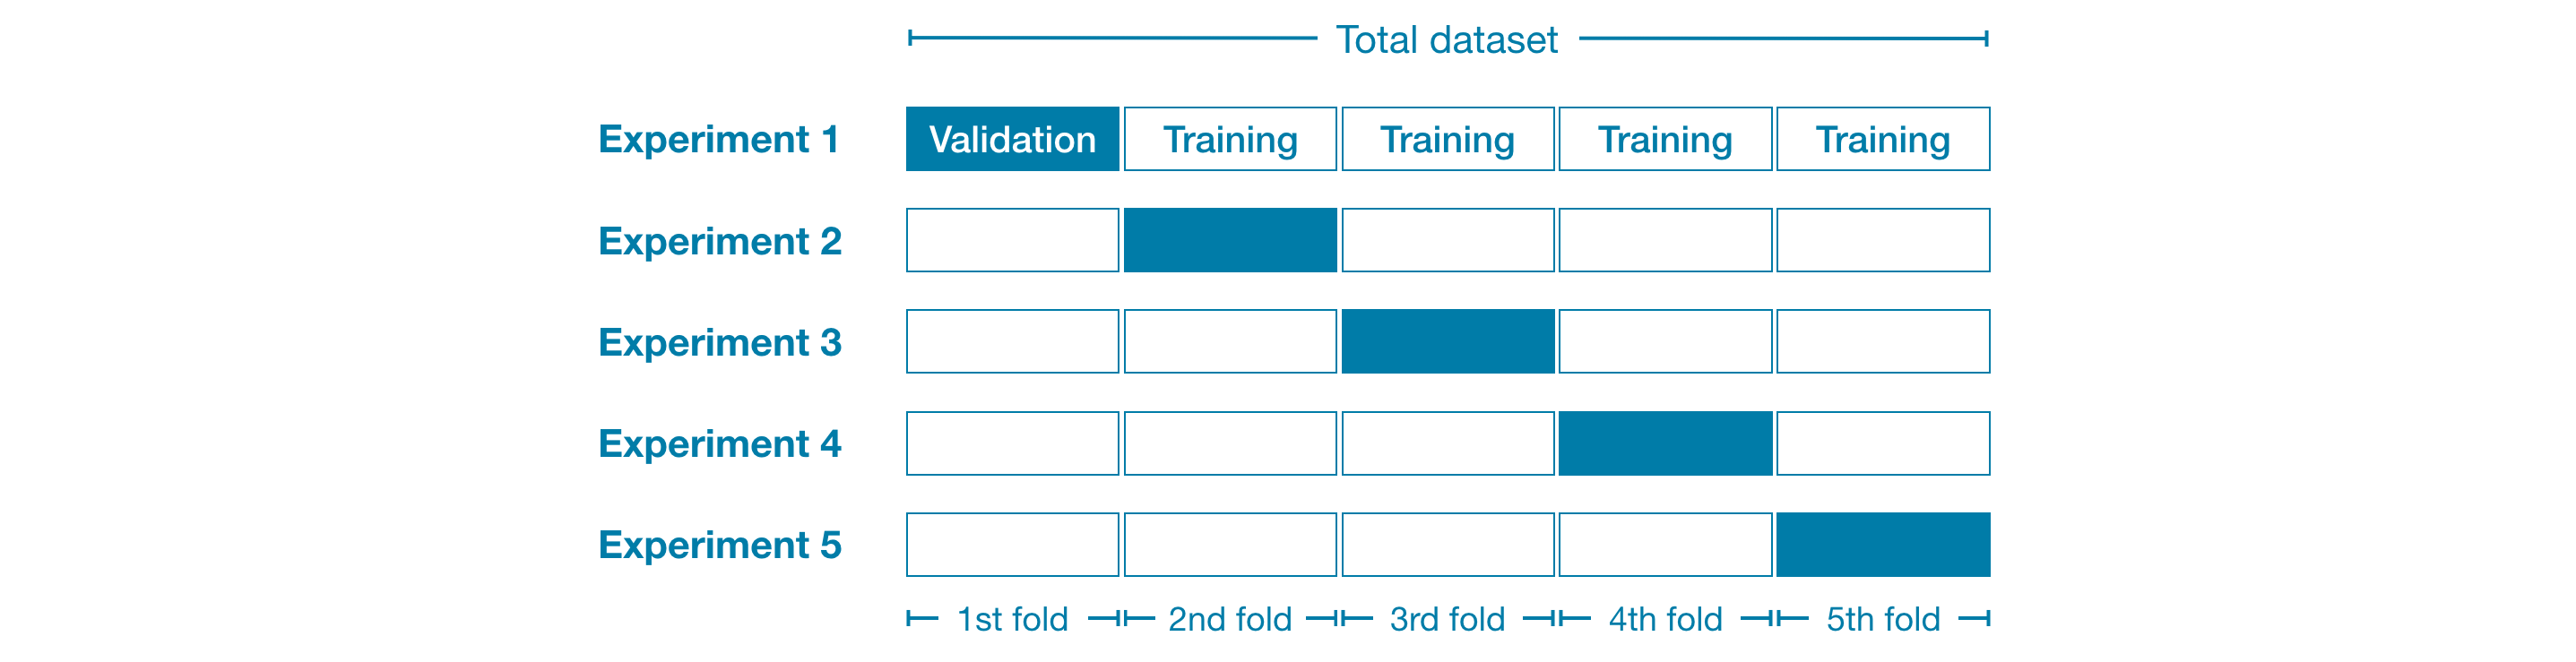

Then, we run one experiment for each fold:

* In __Experiment 1__, we use the first fold as a validation (or holdout) set and everything else as training data. This gives us a measure of model quality based on a 20% holdout set.
* In __Experiment 2__, we hold out data from the second fold (and use everything except the second fold for training the model). The holdout set is then used to get a second estimate of model quality.
* We repeat this process, using every fold once as the holdout set. Putting this together, 100% of the data is used as holdout at some point, and we end up with a measure of model quality that is based on all of the rows in the dataset (even if we don't use all rows simultaneously).

### When should you use cross-validation?

Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take longer to run, because it estimates multiple models (one for each fold).

So, given these tradeoffs, when should you use each approach?

* For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.
* For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

There's no simple threshold for what constitutes a large vs. small dataset. But if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation.

Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment yields the same results, a single validation set is probably sufficient.

#### Example

We'll work with the same data as in the previous tutorial. We load the input data in `X` and the output data in `y`.

In [ ]:
import pandas as pd

# Read the data
data = pd.read_csv('melb_data.csv')

# Select subset of predictors
cols_to_use = ['Rooms','Distance','Landsize','BuildingArea','YearBuilt']
X = data[cols_to_use]

# Select target
y = data.Price

Then, we define a pipeline that uses an imputer to fill in missing values and a random forest model to make predictions.

While it's possible to do cross-validation without pipelines, it is quite difficult! Using a pipeline will make the code remarkably straightforward.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50, random_state=0))])

We obtain the cross-validation scores with the [cross_val_score()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function from scikit-learn. We set the number of folds with the cv parameter.

In [ ]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)

The scoring parameter chooses a measure of model quality to report: in this case, we chose negative mean absolute error (MAE). The docs for scikit-learn show a [list of options](http://scikit-learn.org/stable/modules/model_evaluation.html).

It is a little surprising that we specify negative MAE. Scikit-learn has a convention where all metrics are defined so a high number is better. Using negatives here allows them to be consistent with that convention, though negative MAE is almost unheard of elsewhere.

We typically want a single measure of model quality to compare alternative models. So we take the average across experiments.

In [ ]:
print("Average MAE score (across experiments):")
print(scores.mean())

## Exercise

Run the next code cell without changes to load the training and test data in `X` and `X_test`. For simplicity, we drop categorical variables.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
train_data = pd.read_csv('train.csv', index_col='Id')
test_data = pd.read_csv('test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64','float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

In [ ]:
X.head()

So far, you've learned how to build pipelines with scikit-learn. For instance, the pipeline below will use `SimpleImputer()` to replace missing values in the data, before using `RandomForestRegressor()` to train a random forest model to make predictions. We set the number of trees in the random forest model with the `n_estimators` parameter, and setting `random_state` ensures reproducibility.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))])

You have also learned how to use pipelines in cross-validation. The code below uses the `cross_val_score()` function to obtain the mean absolute error (MAE), averaged across five different folds. Recall we set the number of folds with the `cv` parameter.

In [ ]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
print("Average MAE score:", scores.mean())

### Step 1: Write a useful function

In this exercise, you'll use cross-validation to select parameters for a machine learning model.

Begin by writing a function `get_score()` that reports the average (over three cross-validation folds) MAE of a machine learning pipeline that uses:

* the data in `X` and `y` to create folds,
* `SimpleImputer()` (with all parameters left as default) to replace missing values, and
* `RandomForestRegressor()` (with `random_state=0`) to fit a random forest model.

The `n_estimators` parameter supplied to `get_score()` is used when setting the number of trees in the random forest model.

In [ ]:
def get_score(n_estimators):
    pl = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))])
    scores = -1 * cross_val_score(pl, X, y, cv=3, scoring='neg_mean_absolute_error')
    return (scores.mean())

### Step 2: Test different parameter values

Now, you will use the function that you defined in Step 1 to evaluate the model performance corresponding to eight different values for the number of trees in the random forest: 50, 100, 150, ..., 300, 350, 400.

Store your results in a Python dictionary `results`, where `results[i]` is the average MAE returned by `get_score(i)`.

In [ ]:
for i in range(1,9):
    results = {50*i: get_score(50*i)}
    print(results[i])

In [ ]:
results = {50*i: get_score(50*i) for i in range(1,9)}

In [ ]:
results

### Step 3: Find the best parameter value

Given the results, which value for `n_estimators` seems best for the random forest model? Use your answer to set the value of `n_estimators_best`.

In [ ]:
n_estimators_best = 200

In this exercise, you have explored one method for choosing appropriate parameters in a machine learning model.

If you'd like to learn more about [hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization), you're encouraged to start with grid search, which is a straightforward method for determining the best combination of parameters for a machine learning model. Thankfully, scikit-learn also contains a built-in function `GridSearchCV()` that can make your grid search code very efficient!

# XGBoost

## Lecture

Introduction
For much of this course, you have made predictions with the random forest method, which achieves better performance than a single decision tree simply by averaging the predictions of many decision trees.

We refer to the random forest method as an "ensemble method". By definition, __ensemble methods__ combine the predictions of several models (e.g., several trees, in the case of random forests).

Next, we'll learn about another ensemble method called gradient boosting.

### Gradient Boosting

__Gradient boosting__ is a method that goes through cycles to iteratively add models into an ensemble.

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.)

Then, we start the cycle:

* First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we add the predictions from all models in the ensemble.
* These predictions are used to calculate a loss function (like [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error), for instance).
* Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss. (Side note: The "gradient" in "gradient boosting" refers to the fact that we'll use [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) on the loss function to determine the parameters in this new model.)
* Finally, we add the new model to ensemble, and ...
* ... repeat!

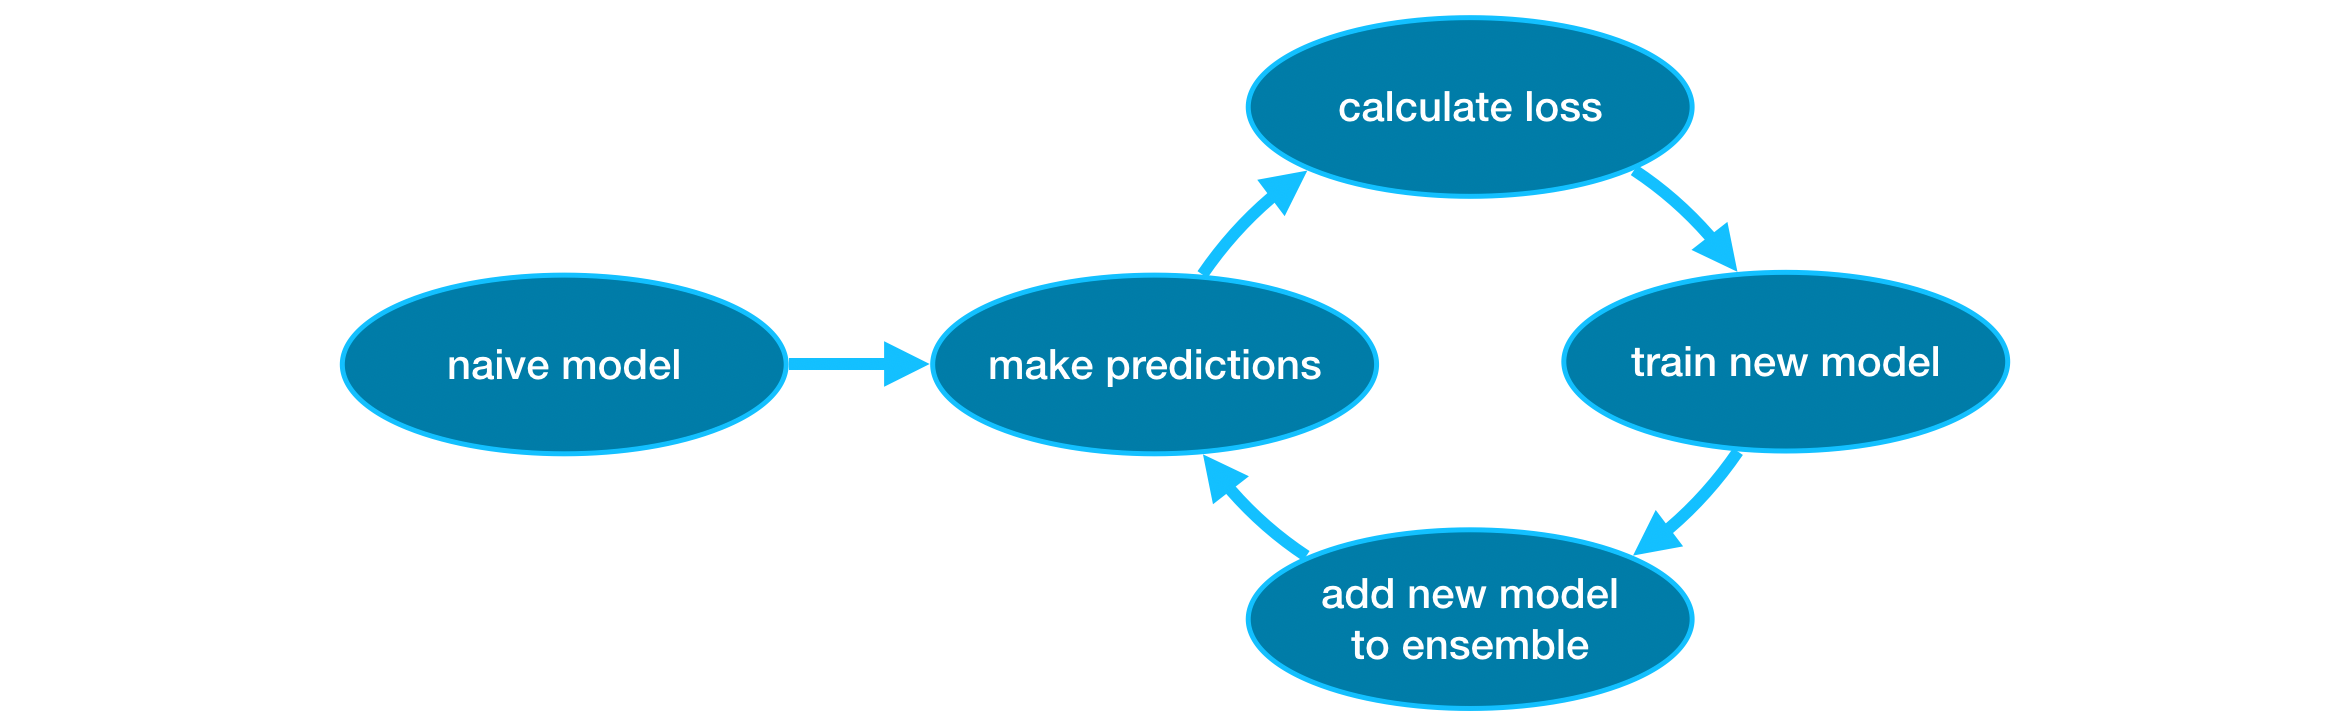

#### Example

We begin by loading the training and validation data in `X_train`, `X_valid`, `y_train`, and `y_valid`.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read data
data = pd.read_csv("melb_data.csv")

# Select subset of predictors
cols_to_use = ['Rooms','Distance','Landsize','BuildingArea','YearBuilt']
X = data[cols_to_use]

# Select target
y = data.Price

# Separate data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

In this example, you'll work with the `XGBoost` library. XGBoost stands for `extreme gradient boosting`, which is an implementation of gradient boosting with several additional features focused on performance and speed. (Scikit-learn has another version of gradient boosting, but XGBoost has some technical advantages.)

In the next code cell, we import the scikit-learn API for XGBoost ([xgboost.XGBRegressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)). This allows us to build and fit a model just as we would in scikit-learn. As you'll see in the output, the `XGBRegressor` class has many tunable parameters -- you'll learn about those soon!

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

### Parameter Tuning

XGBoost has a few parameters that can dramatically affect accuracy and training speed. The first parameters you should understand are:

__n_estimators__

`n_estimators` specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.

* Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
* Too high a value causes overfitting, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).
Typical values range from 100-1000, though this depends a lot on the `learning_rate` parameter discussed below.

Here is the code to set the number of models in the ensemble:

In [ ]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train)

__early_stopping_rounds__

`early_stopping_rounds` offers a way to automatically find the ideal value for `n_estimators`. Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for `n_estimators`. It's smart to set a high value for `n_estimators` and then use `early_stopping_rounds` to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration to allow before stopping. Setting `early_stopping_rounds=5` is a reasonable choice. In this case, we stop after 5 straight rounds of deteriorating validation scores.

When using `early_stopping_rounds`, you also need to set aside some data for calculating the validation scores - this is done by setting the `eval_set parameter`.

We can modify the example above to include early stopping:

In [ ]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train,
            early_stopping_rounds=5,
            eval_set=[(X_valid, y_valid)],
            verbose=False)

If you later want to fit a model with all of your data, set `n_estimators` to whatever value you found to be optimal when run with early stopping.

__learning_rate__

Instead of getting predictions by simply adding up the predictions from each component model, we can multiply the predictions from each model by a small number (known as the __learning rate__) before adding them in.

This means each tree we add to the ensemble helps us less. So, we can set a higher value for `n_estimators` without overfitting. If we use early stopping, the appropriate number of trees will be determined automatically.

In general, a small learning rate and large number of estimators will yield more accurate XGBoost models, though it will also take the model longer to train since it does more iterations through the cycle. As default, XGBoost sets `learning_rate=0.1`.

Modifying the example above to change the learning rate yields the following code:

In [ ]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

__n_jobs__

On larger datasets where runtime is a consideration, you can use parallelism to build your models faster. It's common to set the parameter `n_jobs` equal to the number of cores on your machine. On smaller datasets, this won't help.

The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the fit command.

Here's the modified example:

In [ ]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

## Exercise

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read data
X = pd.read_csv('train.csv', index_col='Id')
X_test = pd.read_csv('test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

In [ ]:
# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 
                       and X_train_full[cname].dtype == 'object']

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64','float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [ ]:
# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

### Step 1: Build model

#### Part A

In this step, you'll build and train your first model with gradient boosting.

* Begin by setting `my_model_1` to an XGBoost model. Use the [XGBRegressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor) class, and set the random seed to 0 `(random_state=0)`. __Leave all other parameters as default__.
* Then, fit the model to the training data in `X_train` and `y_train`.

In [ ]:
from xgboost import XGBRegressor

# Define the model
my_model_1 = XGBRegressor(random_state=0)

# Fit the model
my_model_1.fit(X_train, y_train)

#### Part B

Set `predictions_1` to the model's predictions for the validation data. Recall that the validation features are stored in `X_valid`.

In [ ]:
from sklearn.metrics import mean_absolute_error

# Get predictions
predictions_1 = my_model_1.predict(X_valid)

#### Part C

Finally, use the `mean_absolute_error()` function to calculate the mean absolute error (MAE) corresponding to the predictions for the validation set. Recall that the labels for the validation data are stored in `y_valid`.

In [ ]:
# Calculate MAE
mae_1 = mean_absolute_error(predictions_1, y_valid) # Your code here

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_1)

### Step 2: Improve the model

Now that you've trained a default model as baseline, it's time to tinker with the parameters, to see if you can get better performance!

* Begin by setting `my_model_2` to an XGBoost model, using the XGBRegressor class. Use what you learned in the previous tutorial to figure out how to change the default parameters (like `n_estimators` and `learning_rate`) to get better results.
* Then, fit the model to the training data in `X_train` and `y_train`.
* Set `predictions_2` to the model's predictions for the validation data. Recall that the validation features are stored in `X_valid`.
* Finally, use the `mean_absolute_error()` function to calculate the mean absolute error (MAE) corresponding to the predictions on the validation set. Recall that the labels for the validation data are stored in `y_valid`.

In order for this step to be marked correct, your model in `my_model_2` must attain lower MAE than the model in `my_model_1`.

In [ ]:
# Define the model
my_model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)

# Fit the model
my_model_2.fit(X_train, y_train)

# Get predictions
predictions_2 = my_model_2.predict(X_valid)

# Calculate MAE
mae_2 = mean_absolute_error(predictions_2, y_valid)

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_2)


### Step 3: Break the model

In this step, you will create a model that performs worse than the original model in Step 1. This will help you to develop your intuition for how to set parameters. You might even find that you accidentally get better performance, which is ultimately a nice problem to have and a valuable learning experience!

* Begin by setting `my_model_3` to an XGBoost model, using the XGBRegressor class. Use what you learned in the previous tutorial to figure out how to change the default parameters (like `n_estimators` and `learning_rate`) to design a model to get high MAE.
* Then, fit the model to the training data in `X_train` and `y_train`.
* Set `predictions_3` to the model's predictions for the validation data. Recall that the validation features are stored in `X_valid`.
* Finally, use the `mean_absolute_error()` function to calculate the mean absolute error (MAE) corresponding to the predictions on the validation set. Recall that the labels for the validation data are stored in `y_valid`.
In order for this step to be marked correct, your model in `my_model_3` must attain higher MAE than the model in `my_model_1`.

In [ ]:
# Define the model
my_model_3 = XGBRegressor(n_estimators=10)

# Fit the model
my_model_3.fit(X_train, y_train) # Your code here

# Get predictions
predictions_3 = my_model_3.predict(X_valid)

# Calculate MAE
mae_3 = mean_absolute_error(predictions_3, y_valid)

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_3)

# Data Leakage

## Lecture

### Introduction

Data leakage (or leakage) happens when your training data contains information about the target, but similar data will not be available when the model is used for prediction. This leads to high performance on the training set (and possibly even the validation data), but the model will perform poorly in production.

In other words, leakage causes a model to look accurate until you start making decisions with the model, and then the model becomes very inaccurate.

There are two main types of leakage: __target leakage__ and __train-test contamination__.

#### <ins>Target leakage</ins>

Target leakage occurs when your predictors include data that will not be available at the time you make predictions. It is important to think about target leakage in terms of the timing or chronological order that data becomes available, not merely whether a feature helps make good predictions.

An example will be helpful. Imagine you want to predict who will get sick with pneumonia. The top few rows of your raw data look like this:

|got_pneumonia | age	| weight | male | took_antibiotic_medicine | ... |
|:------------:|:---:|:------:|:----:|:------------------------:| :---: |
|False	      |  65	|   100	 | False| 	False	               | ... |
|False	      |  72	|   130	 | True	|   False	               | ... |
|True	      |  58	|   100	 | False|	True	               | ... |

People take antibiotic medicines after getting pneumonia in order to recover. The raw data shows a strong relationship between those columns, but **took_antibiotic_medicine** is frequently changed after the value for **got_pneumonia** is determined. This is target leakage.

The model would see that anyone who has a value of `False` for `took_antibiotic_medicine` didn't have pneumonia. Since validation data comes from the same source as training data, the pattern will repeat itself in validation, and the model will have great validation (or cross-validation) scores.

But the model will be very inaccurate when subsequently deployed in the real world, because even patients who will get pneumonia won't have received antibiotics yet when we need to make predictions about their future health.

To prevent this type of data leakage, any variable updated (or created) after the target value is realized should be excluded.

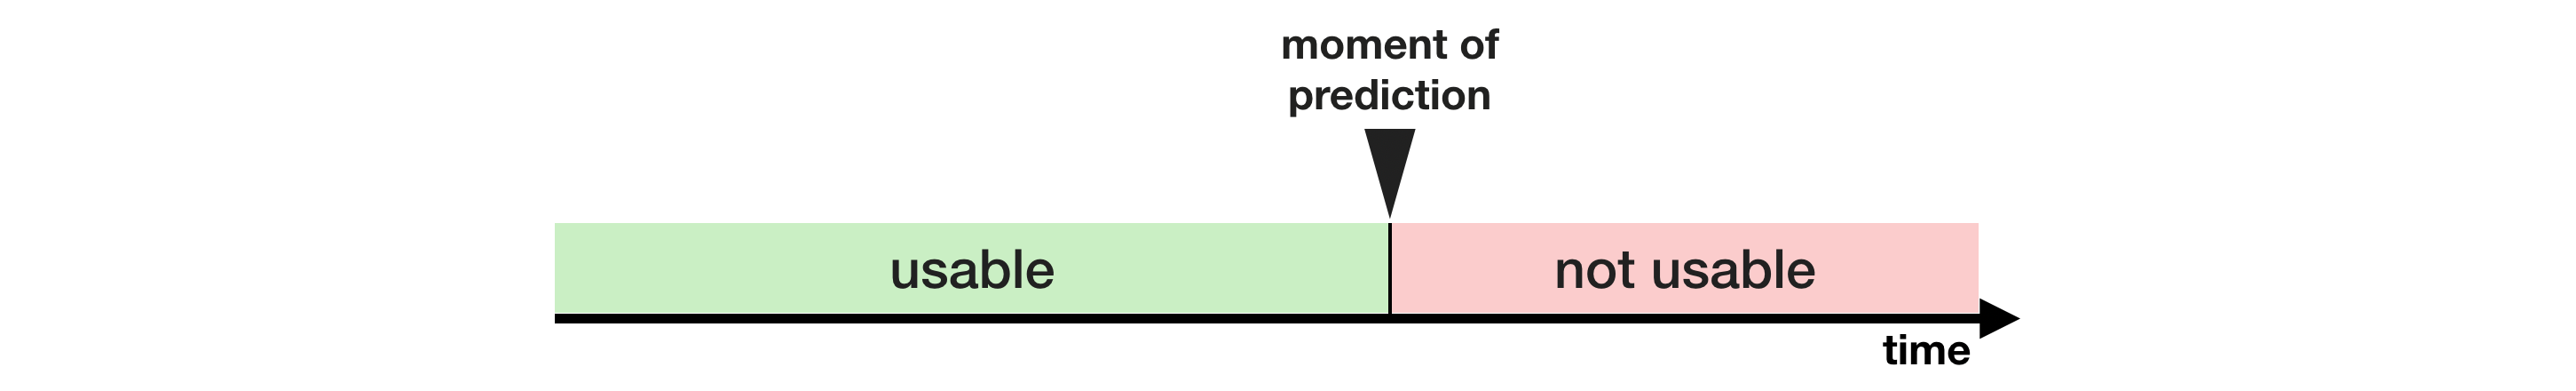

#### <ins>Train-Test Contamination</ins>

A different type of leak occurs when you aren't careful to distinguish training data from validation data.

Recall that validation is meant to be a measure of how the model does on data that it hasn't considered before. You can corrupt this process in subtle ways if the validation data affects the preprocessing behavior. This is sometimes called **train-test contamination**.

For example, imagine you run preprocessing (like fitting an imputer for missing values) before calling [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). The end result? Your model may get good validation scores, giving you great confidence in it, but perform poorly when you deploy it to make decisions.

After all, you incorporated data from the validation or test data into how you make predictions, so the may do well on that particular data even if it can't generalize to new data. This problem becomes even more subtle (and more dangerous) when you do more complex feature engineering.

If your validation is based on a simple train-test split, exclude the validation data from any type of fitting, including the fitting of preprocessing steps. This is easier if you use scikit-learn pipelines. When using cross-validation, it's even more critical that you do your preprocessing inside the pipeline!

### Example

In this example, you will learn one way to detect and remove target leakage.

We will use a dataset about credit card applications and skip the basic data set-up code. The end result is that information about each credit card application is stored in a DataFrame X. We'll use it to predict which applications were accepted in a Series y.

In [1]:
import pandas as pd

# Read data
data = pd.read_csv("AER_credit_card_data.csv", true_values=['yes'], false_values=['no'])

# Select target
y = data.card

# Select predictors
X = data.drop(['card'], axis=1)

print("Number of rows in the dataset:", X.shape[0])
X.head()

Number of rows in the dataset: 1319


,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,37.66667,4.5200,0.033270,124.983300,True,False,3,54,1,12
1,0,33.25000,2.4200,0.005217,9.854167,False,False,3,34,1,13
2,0,33.66667,4.5000,0.004156,15.000000,True,False,4,58,1,5
3,0,30.50000,2.5400,0.065214,137.869200,False,False,0,25,1,7
4,0,32.16667,9.7867,0.067051,546.503300,True,False,2,64,1,5


Since this is a small dataset, we will use cross-validation to ensure accurate measures of model quality.

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Since there is no preprocessing, we don't need a pipeline (used anyway as best practice!)
my_pipeline = make_pipeline(RandomForestClassifier(n_estimators=100))
cv_scores = cross_val_score(my_pipeline, X, y, cv=5, scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 0.979534


With experience, you'll find that it's very rare to find models that are accurate 98% of the time. It happens, but it's uncommon enough that we should inspect the data more closely for target leakage.

Here is a summary of the data, which you can also find under the data tab:

* `card`: 1 if credit card application accepted, 0 if not
* `reports`: Number of major derogatory reports
* `age`: Age n years plus twelfths of a year
* `income`: Yearly income (divided by 10,000)
* `share`: Ratio of monthly credit card expenditure to yearly income
* `expenditure`: Average monthly credit card expenditure
* `owner`: 1 if owns home, 0 if rents
* `selfempl`: 1 if self-employed, 0 if not
* `dependents`: 1 + number of dependents
* `months`: Months living at current address
* `majorcards`: Number of major credit cards held
* `active`: Number of active credit accounts

A few variables look suspicious. For example, does **`expenditure`** mean expenditure on this card or on cards used before applying?

At this point, basic data comparisons can be very helpful:

In [3]:
X.expenditure[y]

0       124.983300
1         9.854167
2        15.000000
3       137.869200
4       546.503300
           ...    
1310      4.583333
1314      7.333333
1316    101.298300
1317     26.996670
1318    344.157500
Name: expenditure, Length: 1023, dtype: float64

In [4]:
X.expenditure[~y]

11      0.0
12      0.0
17      0.0
19      0.0
21      0.0
       ... 
1301    0.0
1311    0.0
1312    0.0
1313    0.0
1315    0.0
Name: expenditure, Length: 296, dtype: float64

In [5]:
expenditures_cardholders = X.expenditure[y]
expenditures_noncardholders = X.expenditure[~y]

print('Fraction of those who did not receive a card and had no expenditures: %.2f' \
      %((expenditures_noncardholders == 0).mean()))
print('Fraction of those who received a card and had no expenditures: %.2f' \
      %(( expenditures_cardholders == 0).mean()))

Fraction of those who did not receive a card and had no expenditures: 1.00
Fraction of those who received a card and had no expenditures: 0.02


As shown above, everyone who did not receive a card had no expenditures, while only 2% of those who received a card had no expenditures. It's not surprising that our model appeared to have a high accuracy. But this also seems to be a case of target leakage, where expenditures probably means expenditures on the card they applied for.

Since `share` is partially determined by `expenditure`, it should be excluded too. The variables `active` and `majorcards` are a little less clear, but from the description, they sound concerning. In most situations, it's better to be safe than sorry if you can't track down the people who created the data to find out more.

We would run a model without target leakage as follows:

In [6]:
# Drop leaky predictors from dataset
potential_leaks = ['expenditure','share','active','majorcards']
X2 = X.drop(potential_leaks, axis=1)

# Evaluate the model with leaky predictors removed
cv_scores = cross_val_score(my_pipeline, X2, y, cv=5, scoring='accuracy')

print("Cross-val accuracy: %f" % cv_scores.mean())

Cross-val accuracy: 0.832443


This accuracy is quite a bit lower, which might be disappointing. However, we can expect it to be right about 80% of the time when used on new applications, whereas the leaky model would likely do much worse than that (in spite of its higher apparent score in cross-validation).

## Exercise

### Step 1: The Data Science of Shoelaces

Nike has hired you as a data science consultant to help them save money on shoe materials. Your first assignment is to review a model one of their employees built to predict how many shoelaces they'll need each month. The features going into the machine learning model include:

* The current month (January, February, etc)
* Advertising expenditures in the previous month
* Various macroeconomic features (like the unemployment rate) as of the beginning of the current month
* The amount of leather they ended up using in the current month

The results show the model is almost perfectly accurate if you include the feature about how much leather they used. But it is only moderately accurate if you leave that feature out. You realize this is because the amount of leather they use is a perfect indicator of how many shoes they produce, which in turn tells you how many shoelaces they need.

Do you think the leather used feature constitutes a source of data leakage? If your answer is "it depends," what does it depend on?

After you have thought about your answer, check it against the solution below.

__Answer__: This is tricky, and it depends on details of how data is collected (which is common when thinking about leakage). Would you at the beginning of the month decide how much leather will be used that month? If so, this is ok. But if that is determined during the month, you would not have access to it when you make the prediction. If you have a guess at the beginning of the month, and it is subsequently changed during the month, the actual amount used during the month cannot be used as a feature (because it causes leakage).

### Step 2: Return of the Shoelaces

You have a new idea. You could use the amount of leather Nike ordered (rather than the amount they actually used) leading up to a given month as a predictor in your shoelace model.

Does this change your answer about whether there is a leakage problem? If you answer "it depends," what does it depend on?

__Answer__: This could be fine, but it depends on whether they order shoelaces first or leather first. If they order shoelaces first, you won't know how much leather they've ordered when you predict their shoelace needs. If they order leather first, then you'll have that number available when you place your shoelace order, and you should be ok.

### Step 3: Getting Rich With Cryptocurrencies?

You saved Nike so much money that they gave you a bonus. Congratulations.

Your friend, who is also a data scientist, says he has built a model that will let you turn your bonus into millions of dollars. Specifically, his model predicts the price of a new cryptocurrency (like Bitcoin, but a newer one) one day ahead of the moment of prediction. His plan is to purchase the cryptocurrency whenever the model says the price of the currency (in dollars) is about to go up.

The most important features in his model are:

* Current price of the currency
* Amount of the currency sold in the last 24 hours
* Change in the currency price in the last 24 hours
* Change in the currency price in the last 1 hour
* Number of new tweets in the last 24 hours that mention the currency

The value of the cryptocurrency in dollars has fluctuated up and down by over $\$$100 in the last year, and yet his model's average error is less than $\$$1. He says this is proof his model is accurate, and you should invest with him, buying the currency whenever the model says it is about to go up.

Is he right? If there is a problem with his model, what is it?

__Answer__: There is no source of leakage here. These features should be available at the moment you want to make a predition, and they're unlikely to be changed in the training data after the prediction target is determined. But, the way he describes accuracy could be misleading if you aren't careful. If the price moves gradually, today's price will be an accurate predictor of tomorrow's price, but it may not tell you whether it's a good time to invest. For instance, if it is $\$$100 today, a model predicting price of $\$$100 tomorrow may seem accurate, even if it can't tell you whether the price is going up or down from the current price. A better prediction target would be the change in price over the next day. If you can consistently predict whether the price is about to go up or down (and by how much), you may have a winning investment opportunity.

### Step 4: Preventing Infections

An agency that provides healthcare wants to predict which patients from a rare surgery are at risk of infection, so it can alert the nurses to be especially careful when following up with those patients.

You want to build a model. Each row in the modeling dataset will be a single patient who received the surgery, and the prediction target will be whether they got an infection.

Some surgeons may do the procedure in a manner that raises or lowers the risk of infection. But how can you best incorporate the surgeon information into the model?

You have a clever idea.

1. Take all surgeries by each surgeon and calculate the infection rate among those surgeons.
2. For each patient in the data, find out who the surgeon was and plug in that surgeon's average infection rate as a feature.

Does this pose any target leakage issues? Does it pose any train-test contamination issues?

__Answer__: This poses a risk of both target leakage and train-test contamination (though you may be able to avoid both if you are careful).

You have target leakage if a given patient's outcome contributes to the infection rate for his surgeon, which is then plugged back into the prediction model for whether that patient becomes infected. You can avoid target leakage if you calculate the surgeon's infection rate by using only the surgeries before the patient we are predicting for. Calculating this for each surgery in your training data may be a little tricky.

You also have a train-test contamination problem if you calculate this using all surgeries a surgeon performed, including those from the test-set. The result would be that your model could look very accurate on the test set, even if it wouldn't generalize well to new patients after the model is deployed. This would happen because the surgeon-risk feature accounts for data in the test set. Test sets exist to estimate how the model will do when seeing new data. So this contamination defeats the purpose of the test set.

### Step 5: Housing Prices

You will build a model to predict housing prices. The model will be deployed on an ongoing basis, to predict the price of a new house when a description is added to a website. Here are four features that could be used as predictors.

1. Size of the house (in square meters)
2. Average sales price of homes in the same neighborhood
3. Latitude and longitude of the house
4. Whether the house has a basement

You have historic data to train and validate the model.

Which of the features is most likely to be a source of leakage?

In [7]:
# Fill in the line below with one of 1, 2, 3 or 4.
potential_leakage_feature = 2

2 is the source of target leakage. Here is an analysis for each feature:

1. The size of a house is unlikely to be changed after it is sold (though technically it's possible). But typically this will be available when we need to make a prediction, and the data won't be modified after the home is sold. So it is pretty safe.

2. We don't know the rules for when this is updated. If the field is updated in the raw data after a home was sold, and the home's sale is used to calculate the average, this constitutes a case of target leakage. At an extreme, if only one home is sold in the neighborhood, and it is the home we are trying to predict, then the average will be exactly equal to the value we are trying to predict. In general, for neighborhoods with few sales, the model will perform very well on the training data. But when you apply the model, the home you are predicting won't have been sold yet, so this feature won't work the same as it did in the training data.

3. These don't change, and will be available at the time we want to make a prediction. So there's no risk of target leakage here.

4. This also doesn't change, and it is available at the time we want to make a prediction. So there's no risk of target leakage here.